# Exploration der Word2vec Embeddings 10

- balanciertes Korpus
- ohne Bigramme
- vector_size: 300
- window: 3
- seed: 1

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import statistics 

from collections import Counter
from gensim.models import KeyedVectors
from gensim.models import Word2Vec
from scipy import spatial
from sklearn.manifold import TSNE
from tabulate import tabulate

In [2]:
# trainierte Modelle laden

w2v1 = Word2Vec.load(os.path.join('../trained_models/Word2Vec10', '10w2v1.model'))
w2v2 = Word2Vec.load(os.path.join('../trained_models/Word2Vec10', '10w2v2.model'))
w2v3 = Word2Vec.load(os.path.join('../trained_models/Word2Vec10', '10w2v3.model'))
w2v4 = Word2Vec.load(os.path.join('../trained_models/Word2Vec10', '10w2v4.model'))
w2v5 = Word2Vec.load(os.path.join('../trained_models/Word2Vec10', '10w2v5.model'))
w2v6 = Word2Vec.load(os.path.join('../trained_models/Word2Vec10', '10w2v6.model'))
w2v7 = Word2Vec.load(os.path.join('../trained_models/Word2Vec10', '10w2v7.model'))
w2v8 = Word2Vec.load(os.path.join('../trained_models/Word2Vec10', '10w2v8.model'))
w2v9 = Word2Vec.load(os.path.join('../trained_models/Word2Vec10', '10w2v9.model'))
w2v10 = Word2Vec.load(os.path.join('../trained_models/Word2Vec10', '10w2v10.model'))
w2v11 = Word2Vec.load(os.path.join('../trained_models/Word2Vec10', '10w2v11.model'))
w2v12 = Word2Vec.load(os.path.join('../trained_models/Word2Vec10', '10w2v12.model'))
w2v13 = Word2Vec.load(os.path.join('../trained_models/Word2Vec10', '10w2v13.model'))

In [3]:
periods = ['1700-1750', '1751-1800', '1801-1825', '1826-1850', '1851-1875', '1876-1900', '1901-1925', 
          '1926-1950', '1951-1975', '1976-2000', '2001-2010', '2011-2016', '2017-2021']

In [4]:
models = [w2v1, w2v2, w2v3, w2v4, w2v5, w2v6, w2v7, w2v8, w2v9, w2v10, w2v11, w2v12, w2v13] 

In [5]:
# Hilfsfunktion zum Vergleich der most similar words eines Lemmas in den Zeitabschnitten

def compare_words(periods, models, word):
    msw = {}
    for p, m in zip(periods, models):
        if word in m.wv:
            msw.update({p : m.wv.most_similar(positive=[word], topn=10)})
        elif word not in m.wv:
            msw.update({p : 'not in vocab'})
    table = pd.DataFrame.from_dict(msw)
    return table

In [6]:
# Hilfsfunktion zum Vergleich der Cosinus-Ähnlichkeit in den Zeitabschnitten

def compare_cos(periods, models, word1, word2):
    cosines = {}
    for p, m in zip(periods, models):
        if word1 in m.wv:
            vector1 = m.wv[word1]  
            vector2 = m.wv[word2]  
            cos = 1 - spatial.distance.cosine(vector1, vector2) 
            cosines.update({p : cos})
    return cosines

## Kontrollgruppe

### Kontrollgruppe - molto

In [7]:
domani0 = compare_cos(periods, models, 'domani', 'molto')
finora0 = compare_cos(periods, models, 'finora', 'molto')
ieri0 = compare_cos(periods, models, 'ieri', 'molto')
oggi0 = compare_cos(periods, models, 'oggi', 'molto')
presto0 = compare_cos(periods, models, 'presto', 'molto')
sempre0 = compare_cos(periods, models, 'sempre', 'molto')
spesso0 = compare_cos(periods, models, 'spesso', 'molto')

In [8]:
presto0

{'1700-1750': 0.23295597732067108,
 '1751-1800': 0.2461724728345871,
 '1801-1825': 0.36806735396385193,
 '1826-1850': 0.34714704751968384,
 '1851-1875': 0.2793465852737427,
 '1876-1900': 0.29434314370155334,
 '1901-1925': 0.23937483131885529,
 '1926-1950': 0.21029002964496613,
 '1951-1975': 0.31505241990089417,
 '1976-2000': 0.3155420422554016,
 '2001-2010': 0.3069007396697998,
 '2011-2016': 0.2529377043247223,
 '2017-2021': 0.36279720067977905}

In [9]:
molto_df = pd.DataFrame([domani0, finora0, ieri0, oggi0, presto0, sempre0, spesso0])

# Durchschnitt pro Zeitraum
molto_mean = dict(molto_df.mean())

# min pro Zeitraum
molto_min = dict(molto_df.min())
molto_min_list = [float(x) for x in list(molto_min.values())]

#max pro Zeitraum 
molto_max = dict(molto_df.max())
molto_max_list = [float(x) for x in list(molto_max.values())]

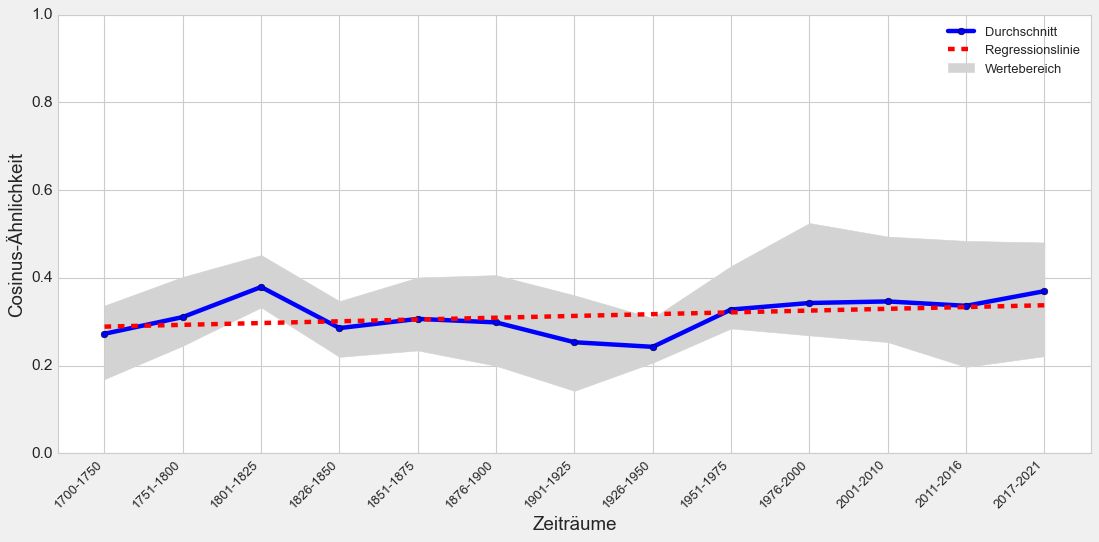

In [13]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(molto_mean)))
plt.xticks(ticks=x_indexes, labels=molto_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, molto_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, molto_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, molto_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, molto_max_list, molto_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(molto_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### Kontrollgruppe - Quelldomäne

In [14]:
# domani 

domani1 = compare_cos(periods, models, 'domani', 'angoscia')
domani2 = compare_cos(periods, models, 'domani', 'atterrire')
domani3 = compare_cos(periods, models, 'domani', 'panico')
domani4 = compare_cos(periods, models, 'domani', 'paura')
domani5 = compare_cos(periods, models, 'domani', 'raccapricciare')
domani6 = compare_cos(periods, models, 'domani', 'schifo')
domani7 = compare_cos(periods, models, 'domani', 'sgomentare')
domani8 = compare_cos(periods, models, 'domani', 'sgomento')
domani9 = compare_cos(periods, models, 'domani', 'spaventare')
domani10 = compare_cos(periods, models, 'domani', 'spavento')
domani11 = compare_cos(periods, models, 'domani', 'terrore')

domani_df = pd.DataFrame([domani1, domani2, domani3, domani4, domani5, domani6, domani7, domani8, domani9, domani10, domani11])

# Durchschnitt pro Zeitraum
domani_mean = dict(domani_df.mean())

# min pro Zeitraum
domani_min = dict(domani_df.min())
domani_min_list = [float(x) for x in list(domani_min.values())]

#max pro Zeitraum 
domani_max = dict(domani_df.max())
domani_max_list = [float(x) for x in list(domani_max.values())]

In [15]:
# finora 

finora1 = compare_cos(periods, models, 'finora', 'angoscia')
finora2 = compare_cos(periods, models, 'finora', 'atterrire')
finora3 = compare_cos(periods, models, 'finora', 'panico')
finora4 = compare_cos(periods, models, 'finora', 'paura')
finora5 = compare_cos(periods, models, 'finora', 'raccapricciare')
finora6 = compare_cos(periods, models, 'finora', 'schifo')
finora7 = compare_cos(periods, models, 'finora', 'sgomentare')
finora8 = compare_cos(periods, models, 'finora', 'sgomento')
finora9 = compare_cos(periods, models, 'finora', 'spaventare')
finora10 = compare_cos(periods, models, 'finora', 'spavento')
finora11 = compare_cos(periods, models, 'finora', 'terrore')

finora_df = pd.DataFrame([finora1, finora2, finora3, finora4, finora5, finora6, finora7, finora8, finora9, finora10, finora11])

# Durchschnitt pro Zeitraum
finora_mean = dict(finora_df.mean())

# min pro Zeitraum
finora_min = dict(finora_df.min())
finora_min_list = [float(x) for x in list(finora_min.values())]

#max pro Zeitraum 
finora_max = dict(finora_df.max())
finora_max_list = [float(x) for x in list(finora_max.values())]

In [16]:
# ieri 

ieri1 = compare_cos(periods, models, 'ieri', 'angoscia')
ieri2 = compare_cos(periods, models, 'ieri', 'atterrire')
ieri3 = compare_cos(periods, models, 'ieri', 'panico')
ieri4 = compare_cos(periods, models, 'ieri', 'paura')
ieri5 = compare_cos(periods, models, 'ieri', 'raccapricciare')
ieri6 = compare_cos(periods, models, 'ieri', 'schifo')
ieri7 = compare_cos(periods, models, 'ieri', 'sgomentare')
ieri8 = compare_cos(periods, models, 'ieri', 'sgomento')
ieri9 = compare_cos(periods, models, 'ieri', 'spaventare')
ieri10 = compare_cos(periods, models, 'ieri', 'spavento')
ieri11 = compare_cos(periods, models, 'ieri', 'terrore')

ieri_df = pd.DataFrame([ieri1, ieri2, ieri3, ieri4, ieri5, ieri6, ieri7, ieri8, ieri9, ieri10, ieri11])

# Durchschnitt pro Zeitraum
ieri_mean = dict(ieri_df.mean())

# min pro Zeitraum
ieri_min = dict(ieri_df.min())
ieri_min_list = [float(x) for x in list(ieri_min.values())]

#max pro Zeitraum 
ieri_max = dict(ieri_df.max())
ieri_max_list = [float(x) for x in list(ieri_max.values())]

In [17]:
# oggi 

oggi1 = compare_cos(periods, models, 'oggi', 'angoscia')
oggi2 = compare_cos(periods, models, 'oggi', 'atterrire')
oggi3 = compare_cos(periods, models, 'oggi', 'panico')
oggi4 = compare_cos(periods, models, 'oggi', 'paura')
oggi5 = compare_cos(periods, models, 'oggi', 'raccapricciare')
oggi6 = compare_cos(periods, models, 'oggi', 'schifo')
oggi7 = compare_cos(periods, models, 'oggi', 'sgomentare')
oggi8 = compare_cos(periods, models, 'oggi', 'sgomento')
oggi9 = compare_cos(periods, models, 'oggi', 'spaventare')
oggi10 = compare_cos(periods, models, 'oggi', 'spavento')
oggi11 = compare_cos(periods, models, 'oggi', 'terrore')

oggi_df = pd.DataFrame([oggi1, oggi2, oggi3, oggi4, oggi5, oggi6, oggi7, oggi8, oggi9, oggi10, oggi11])

# Durchschnitt pro Zeitraum
oggi_mean = dict(oggi_df.mean())

# min pro Zeitraum
oggi_min = dict(oggi_df.min())
oggi_min_list = [float(x) for x in list(oggi_min.values())]

#max pro Zeitraum 
oggi_max = dict(oggi_df.max())
oggi_max_list = [float(x) for x in list(oggi_max.values())]

In [18]:
# presto 

presto1 = compare_cos(periods, models, 'presto', 'angoscia')
presto2 = compare_cos(periods, models, 'presto', 'atterrire')
presto3 = compare_cos(periods, models, 'presto', 'panico')
presto4 = compare_cos(periods, models, 'presto', 'paura')
presto5 = compare_cos(periods, models, 'presto', 'raccapricciare')
presto6 = compare_cos(periods, models, 'presto', 'schifo')
presto7 = compare_cos(periods, models, 'presto', 'sgomentare')
presto8 = compare_cos(periods, models, 'presto', 'sgomento')
presto9 = compare_cos(periods, models, 'presto', 'spaventare')
presto10 = compare_cos(periods, models, 'presto', 'spavento')
presto11 = compare_cos(periods, models, 'presto', 'terrore')

presto_df = pd.DataFrame([presto1, presto2, presto3, presto4, presto5, presto6, presto7, presto8, presto9, presto10, presto11])

# Durchschnitt pro Zeitraum
presto_mean = dict(presto_df.mean())

# min pro Zeitraum
presto_min = dict(presto_df.min())
presto_min_list = [float(x) for x in list(presto_min.values())]

#max pro Zeitraum 
presto_max = dict(presto_df.max())
presto_max_list = [float(x) for x in list(presto_max.values())]

In [19]:
# sempre 

sempre1 = compare_cos(periods, models, 'sempre', 'angoscia')
sempre2 = compare_cos(periods, models, 'sempre', 'atterrire')
sempre3 = compare_cos(periods, models, 'sempre', 'panico')
sempre4 = compare_cos(periods, models, 'sempre', 'paura')
sempre5 = compare_cos(periods, models, 'sempre', 'raccapricciare')
sempre6 = compare_cos(periods, models, 'sempre', 'schifo')
sempre7 = compare_cos(periods, models, 'sempre', 'sgomentare')
sempre8 = compare_cos(periods, models, 'sempre', 'sgomento')
sempre9 = compare_cos(periods, models, 'sempre', 'spaventare')
sempre10 = compare_cos(periods, models, 'sempre', 'spavento')
sempre11 = compare_cos(periods, models, 'sempre', 'terrore')

sempre_df = pd.DataFrame([sempre1, sempre2, sempre3, sempre4, sempre5, sempre6, sempre7, sempre8, sempre9, sempre10, sempre11])

# Durchschnitt pro Zeitraum
sempre_mean = dict(sempre_df.mean())

# min pro Zeitraum
sempre_min = dict(sempre_df.min())
sempre_min_list = [float(x) for x in list(sempre_min.values())]

#max pro Zeitraum 
sempre_max = dict(sempre_df.max())
sempre_max_list = [float(x) for x in list(sempre_max.values())]

In [20]:
# spesso 

spesso1 = compare_cos(periods, models, 'spesso', 'angoscia')
spesso2 = compare_cos(periods, models, 'spesso', 'atterrire')
spesso3 = compare_cos(periods, models, 'spesso', 'panico')
spesso4 = compare_cos(periods, models, 'spesso', 'paura')
spesso5 = compare_cos(periods, models, 'spesso', 'raccapricciare')
spesso6 = compare_cos(periods, models, 'spesso', 'schifo')
spesso7 = compare_cos(periods, models, 'spesso', 'sgomentare')
spesso8 = compare_cos(periods, models, 'spesso', 'sgomento')
spesso9 = compare_cos(periods, models, 'spesso', 'spaventare')
spesso10 = compare_cos(periods, models, 'spesso', 'spavento')
spesso11 = compare_cos(periods, models, 'spesso', 'terrore')

spesso_df = pd.DataFrame([spesso1, spesso2, spesso3, spesso4, spesso5, spesso6, spesso7, spesso8, spesso9, spesso10, spesso11])

# Durchschnitt pro Zeitraum
spesso_mean = dict(spesso_df.mean())

# min pro Zeitraum
spesso_min = dict(spesso_df.min())
spesso_min_list = [float(x) for x in list(spesso_min.values())]

#max pro Zeitraum 
spesso_max = dict(spesso_df.max())
spesso_max_list = [float(x) for x in list(spesso_max.values())]

#### Kontrollgruppe - Quelldomäne gesamt

In [21]:
# Durchschnitt gesamt

control_mean_df = pd.DataFrame([domani_mean, finora_mean, ieri_mean, oggi_mean, presto_mean, sempre_mean, spesso_mean])
control_mean = dict(control_mean_df.mean())

In [22]:
# min gesamt

control_min_df = pd.DataFrame([domani_min, finora_min, ieri_min, oggi_min, presto_min, sempre_min, spesso_min])
control_min = dict(control_min_df.min())
control_min_list = [float(x) for x in list(control_min.values())]

In [23]:
# max gesamt

control_max_df = pd.DataFrame([domani_max, finora_max, ieri_max, oggi_max, presto_max, sempre_max, spesso_max])
control_max = dict(control_max_df.max())
control_max_list = [float(x) for x in list(control_max.values())]

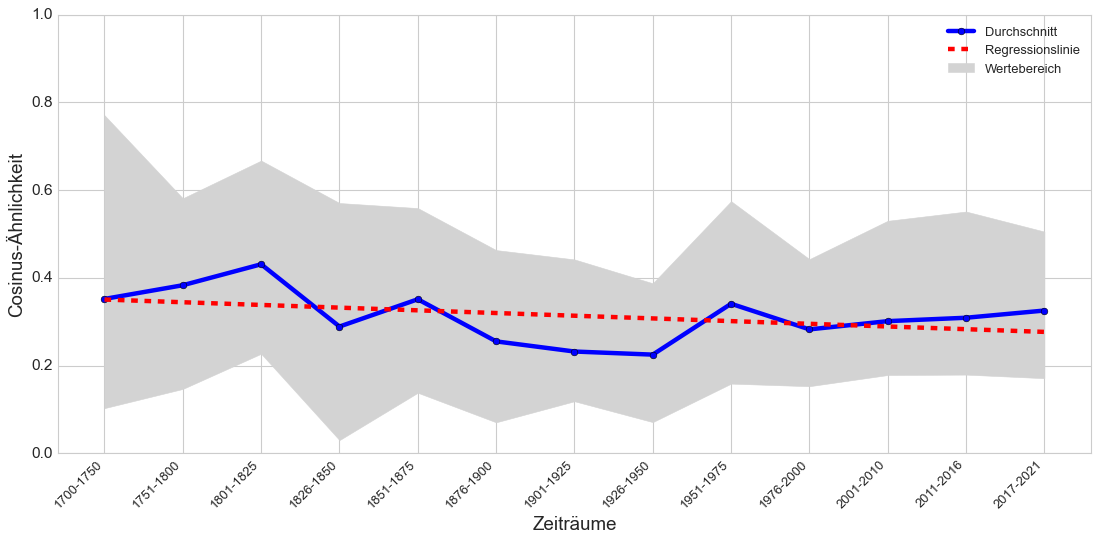

In [24]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(control_mean)))
plt.xticks(ticks=x_indexes, labels=control_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, control_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, control_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, control_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, control_max_list, control_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(control_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

## Adverbien

### atrocemente

In [25]:
compare_words(periods, models, 'atrocemente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1975,1976-2000,2001-2010,2011-2016,2017-2021
0,"(imprenditore, 0.9638625979423523)","(gisti, 0.9765260815620422)","(concentravasi, 0.9723355174064636)","(incrudelire, 0.8833639025688171)","(crudeltà, 0.9098188877105713)","(infliggere, 0.7523884177207947)","(cagion, 0.8402425050735474)","(straziare, 0.8434960246086121)","(fantasticare, 0.8630653023719788)","(atroce, 0.8407183289527893)","(torturare, 0.8659681081771851)","(torturare, 0.8864608407020569)","(atterrita, 0.8742337822914124)"
1,"(trattenervi, 0.9583115577697754)","(allhor, 0.9757799506187439)","(dichiarandolo, 0.9711406230926514)","(liberatore, 0.8695427775382996)","(bestiale, 0.905891478061676)","(inflessibile, 0.7439814209938049)","(riamare, 0.8256670236587524)","(torturare, 0.8396902680397034)","(azaele, 0.8377776145935059)","(primitivo, 0.8399917483329773)","(mutilare, 0.8431128263473511)","(innocente, 0.8508893847465515)","(gola, 0.8709980249404907)"
2,"(malvaggio, 0.9569780826568604)","(belpulsi, 0.9753799438476562)","(rigidit, 0.9704305529594421)","(assalito, 0.8667554259300232)","(obbrobrio, 0.8995222449302673)","(insulto, 0.7404820322990417)","(straziato, 0.8109838962554932)","(atroce, 0.8385130167007446)","(impaurita, 0.8371953964233398)","(eroico, 0.8364191651344299)","(orribilmente, 0.8389376997947693)","(perseguitare, 0.850768506526947)","(pianto, 0.8588628768920898)"
3,"(perniziose, 0.956966757774353)","(sopita, 0.9741948246955872)","(sottilissime, 0.9702611565589905)","(odiato, 0.8659155964851379)","(spietato, 0.8961430788040161)","(persecuzione, 0.7360402345657349)","(straziare, 0.8053657412528992)","(scampato, 0.8368096351623535)","(prostrare, 0.8336496949195862)","(ferocia, 0.8355380296707153)","(orrendamente, 0.8371846675872803)","(inerme, 0.8422285318374634)","(demone, 0.856253445148468)"
4,"(tirarvene, 0.9560250043869019)","(trasgressione, 0.9741142392158508)","(sopranumerario, 0.9698624610900879)","(vilipendere, 0.8631545305252075)","(insulto, 0.8932231664657593)","(inesorabilmente, 0.7313171625137329)","(sofferse, 0.7977772355079651)","(patito, 0.820833683013916)","(storpio, 0.8335026502609253)","(odioso, 0.8344998359680176)","(sfigurare, 0.8344686627388)","(oltraggiare, 0.8399016261100769)","(sfigurare, 0.8513679504394531)"
5,"(dolervi, 0.95598304271698)","(congruente, 0.9740508794784546)","(dilettandola, 0.9698537588119507)","(potean, 0.8628009557723999)","(crudelmente, 0.8897402882575989)","(umiltà, 0.7309236526489258)","(deluso, 0.7976381182670593)","(attanagliare, 0.8145648241043091)","(fiora, 0.8328648805618286)","(dolorosamente, 0.8344284892082214)","(dilaniare, 0.8253597021102905)","(vile, 0.8382638692855835)","(crudele, 0.850374162197113)"
6,"(disprezzandomi, 0.9558041095733643)","(apalaschi, 0.9734229445457458)","(avrebbera, 0.9698078036308289)","(ciecamente, 0.8626626133918762)","(disonorare, 0.8865232467651367)","(indomabile, 0.7218888998031616)","(torturare, 0.7963953614234924)","(avvilimento, 0.8131381869316101)","(allor, 0.8320842981338501)","(schizofrenico, 0.8337501883506775)","(maledizione, 0.8227519392967224)","(matrigna, 0.8331046104431152)","(morso, 0.8435320258140564)"
7,"(turbarci, 0.9557473063468933)","(amaturus, 0.9729019403457642)","(contradittorii, 0.9695230722427368)","(libidine, 0.8625867366790771)","(sfinimento, 0.8864667415618896)","(calunnia, 0.7216257452964783)","(assassinare, 0.795804500579834)","(scontentezza, 0.8069784045219421)","(leah, 0.8305836319923401)","(anoressia, 0.8316957950592041)","(gravemente, 0.8164215683937073)","(terrorizzare, 0.8297385573387146)","(angosciato, 0.8434812426567078)"
8,"(dispendiato, 0.9557333588600159)","(pitea, 0.9726191759109497)","(sammaria, 0.9694597125053406)","(riparar, 0.8621562123298645)","(irritato, 0.8847914338111877)","(vilipendere, 0.7215487360954285)","(prigionia, 0.7937968969345093)","(insulto, 0.8066709041595459)","(rannicchiare, 0.8289694786071777)","(lineamento, 0.8301047682762

In [26]:
compare_cos(periods, models, 'atrocemente', 'molto')

{'1700-1750': 0.41769230365753174,
 '1751-1800': 0.4450407326221466,
 '1801-1825': 0.4936726689338684,
 '1826-1850': 0.4077761471271515,
 '1851-1875': 0.5189500451087952,
 '1876-1900': 0.3729996681213379,
 '1901-1925': 0.4452245831489563,
 '1926-1950': 0.33402928709983826,
 '1951-1975': 0.34910520911216736,
 '1976-2000': 0.48757851123809814,
 '2001-2010': 0.44880813360214233,
 '2011-2016': 0.3684031069278717,
 '2017-2021': 0.4094406068325043}

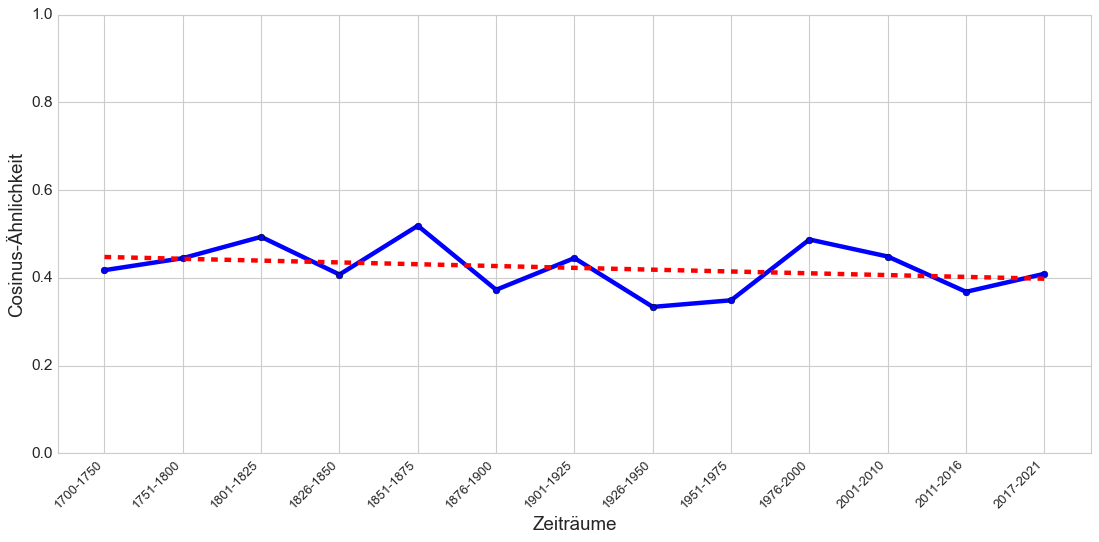

In [27]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'atrocemente', 'molto')
x_indexes = np.arange(len(data))
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)
plt.plot(x_indexes, data.values(), label='atrocemente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

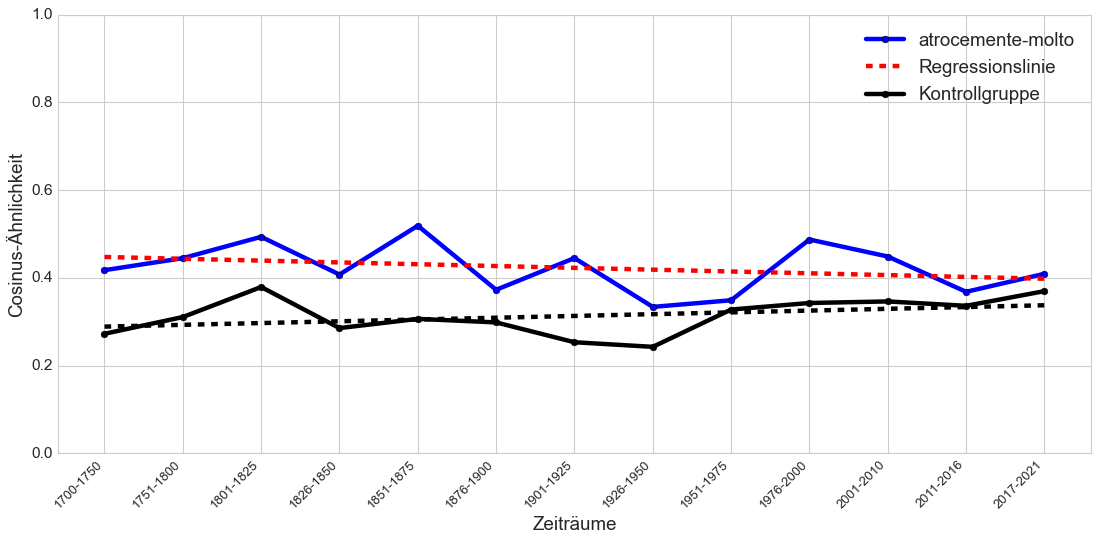

In [28]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'atrocemente', 'molto')
x_indexes = np.arange(len(data))
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)
plt.plot(x_indexes, data.values(), label='atrocemente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

# Kontrollgruppe
plt.plot(x_indexes, molto_mean.values(), label='Kontrollgruppe', marker='o', color='black')
coef = np.polyfit(x_indexes, list(molto_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), linestyle='--', color='black')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right')

plt.show()

In [29]:
atrocemente1 = compare_cos(periods, models, 'atrocemente', 'angoscia')
atrocemente2 = compare_cos(periods, models, 'atrocemente', 'atterrire')
atrocemente3 = compare_cos(periods, models, 'atrocemente', 'panico')
atrocemente4 = compare_cos(periods, models, 'atrocemente', 'paura')
atrocemente5 = compare_cos(periods, models, 'atrocemente', 'raccapricciare')
atrocemente6 = compare_cos(periods, models, 'atrocemente', 'schifo')
atrocemente7 = compare_cos(periods, models, 'atrocemente', 'sgomentare')
atrocemente8 = compare_cos(periods, models, 'atrocemente', 'sgomento')
atrocemente9 = compare_cos(periods, models, 'atrocemente', 'spaventare')
atrocemente10 = compare_cos(periods, models, 'atrocemente', 'spavento')
atrocemente11 = compare_cos(periods, models, 'atrocemente', 'terrore')

In [30]:
atrocemente1

{'1700-1750': 0.750234842300415,
 '1751-1800': 0.5770835280418396,
 '1801-1825': 0.6013908982276917,
 '1826-1850': 0.47424113750457764,
 '1851-1875': 0.5713779926300049,
 '1876-1900': 0.5430886745452881,
 '1901-1925': 0.4579680263996124,
 '1926-1950': 0.4447679817676544,
 '1951-1975': 0.5716358423233032,
 '1976-2000': 0.4362027049064636,
 '2001-2010': 0.5930672287940979,
 '2011-2016': 0.6147016286849976,
 '2017-2021': 0.6747666001319885}

In [31]:
atrocemente_df = pd.DataFrame([atrocemente1, atrocemente2, atrocemente3, atrocemente4, atrocemente5, atrocemente6, atrocemente7, atrocemente8, atrocemente9, atrocemente10, atrocemente11])

# Durchschnitt pro Zeitraum
atrocemente_mean = dict(atrocemente_df.mean())

# min pro Zeitraum
atrocemente_min = dict(atrocemente_df.min())
atrocemente_min_list = [float(x) for x in list(atrocemente_min.values())]

#max pro Zeitraum 
atrocemente_max = dict(atrocemente_df.max())
atrocemente_max_list = [float(x) for x in list(atrocemente_max.values())]

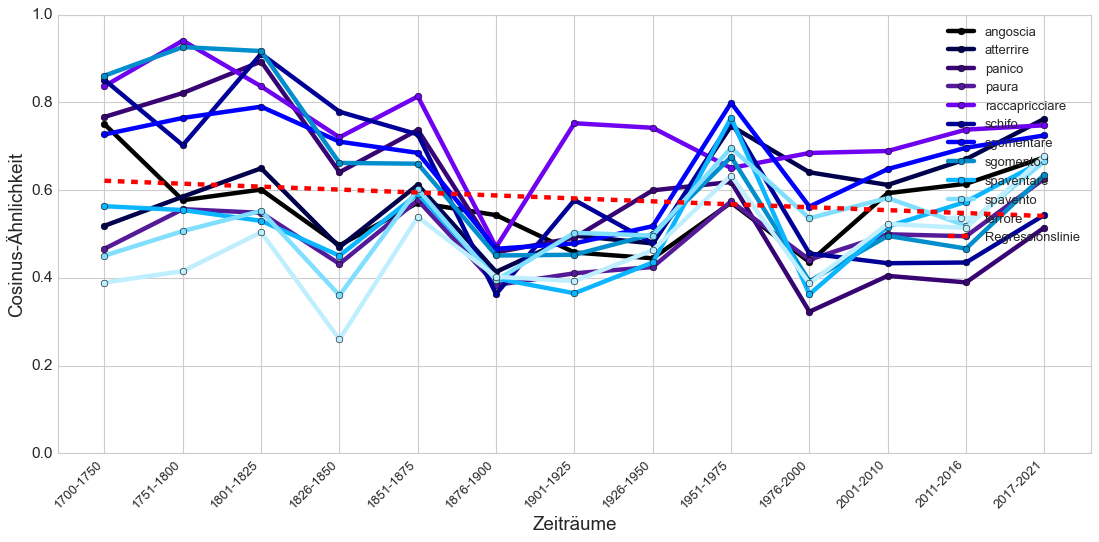

In [32]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(atrocemente_mean)))
plt.xticks(ticks=x_indexes, labels=atrocemente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, atrocemente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, atrocemente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, atrocemente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, atrocemente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, atrocemente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, atrocemente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, atrocemente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, atrocemente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, atrocemente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, atrocemente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, atrocemente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, atrocemente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(atrocemente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

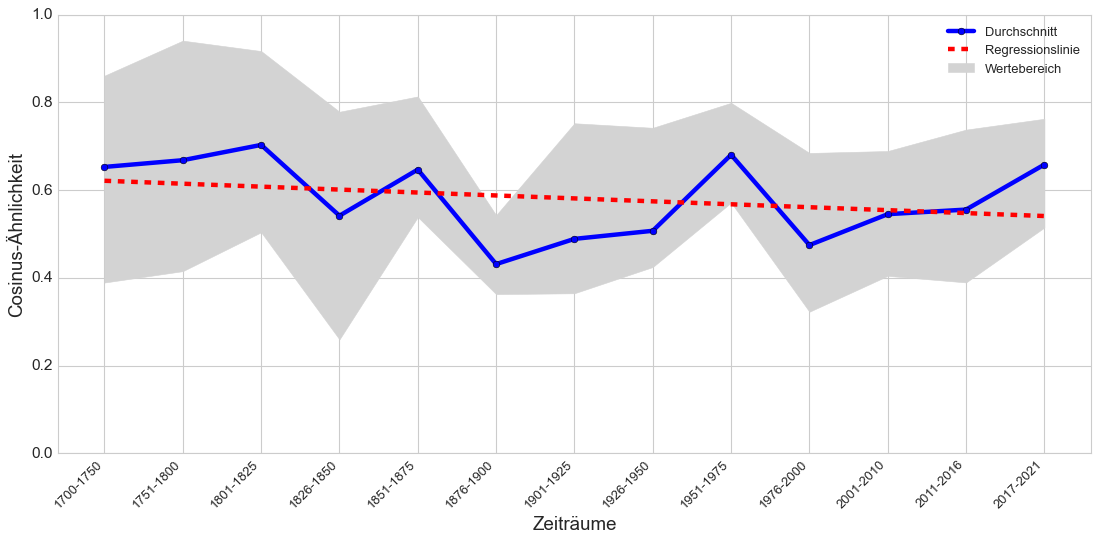

In [33]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(atrocemente_mean)))
plt.xticks(ticks=x_indexes, labels=atrocemente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, atrocemente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, atrocemente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, atrocemente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, atrocemente_max_list, atrocemente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(atrocemente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

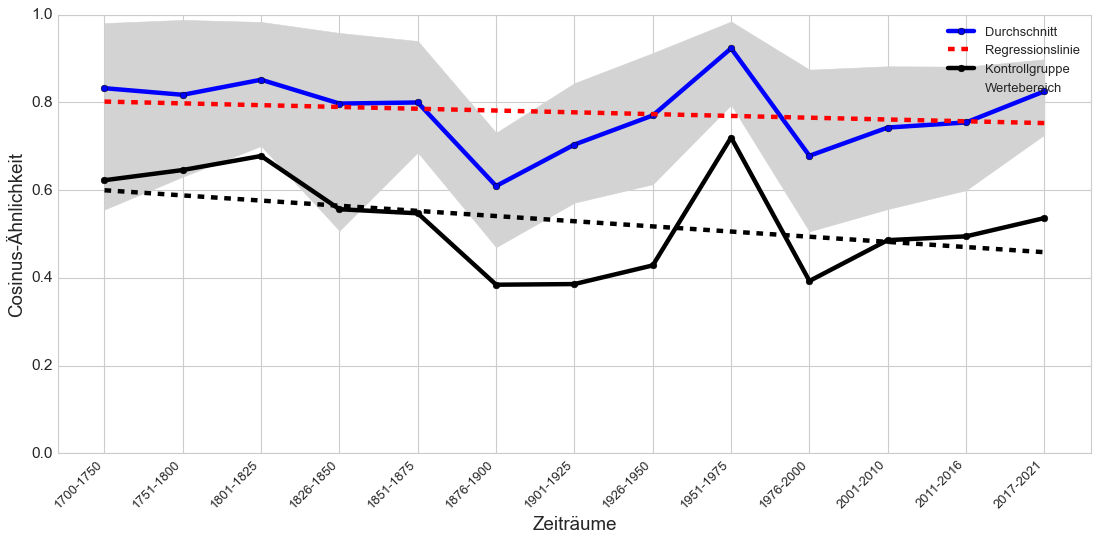

In [35]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(atrocemente_mean)))
plt.xticks(ticks=x_indexes, labels=atrocemente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, atrocemente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, atrocemente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, atrocemente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, atrocemente_max_list, atrocemente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(atrocemente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

#Kontrollgruppe
plt.plot(x_indexes, control_mean.values(), label='Kontrollgruppe', marker='o', color='black')
coef = np.polyfit(x_indexes, list(control_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), linestyle='--', color='black')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### formidabilmente

In [34]:
compare_words(periods, models, 'formidabilmente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1975,1976-2000,2001-2010,2011-2016,2017-2021
0,not in vocab,not in vocab,not in vocab,"(raggrinza, 0.9840710163116455)","(fuscello, 0.9808155298233032)","(impallidita, 0.9482629895210266)","(battuto, 0.9052040576934814)","(fisiologia, 0.9382160305976868)",not in vocab,"(mitteleuropa, 0.9770439863204956)","(smisurato, 0.9332318305969238)","(pel, 0.9410384297370911)","(sotteso, 0.9448122978210449)"
1,not in vocab,not in vocab,not in vocab,"(dovera, 0.979383111000061)","(mojar, 0.9782974720001221)","(pizzicottare, 0.9476896524429321)","(casolari, 0.9047279357910156)","(notorie, 0.9381085634231567)",not in vocab,"(sofisticati, 0.974775493144989)","(annidare, 0.9281627535820007)","(cosmico, 0.9388158321380615)","(antropologico, 0.9437754154205322)"
2,not in vocab,not in vocab,not in vocab,"(falegico, 0.977815568447113)","(bufala, 0.9780145287513733)","(assiderare, 0.9451993107795715)","(mimose, 0.9009689688682556)","(uditivo, 0.9359822869300842)",not in vocab,"(macintosh, 0.9744852781295776)","(insito, 0.9265459179878235)","(disordinato, 0.9382811784744263)","(trascendere, 0.943325400352478)"
3,not in vocab,not in vocab,not in vocab,"(intelligensa, 0.9772480130195618)","(avversarlo, 0.9768059253692627)","(miagolare, 0.9443202614784241)","(frusco, 0.9005348682403564)","(plasticità, 0.934292733669281)",not in vocab,"(antartico, 0.9737679958343506)","(cibernetico, 0.9263597130775452)","(pregno, 0.938270092010498)","(autodistruzione, 0.9432810544967651)"
4,not in vocab,not in vocab,not in vocab,"(herschel, 0.975994884967804)","(acquaio, 0.9765854477882385)","(euforione, 0.9443071484565735)","(interruppero, 0.9001801609992981)","(inversamente, 0.9341381192207336)",not in vocab,"(errante, 0.9729962944984436)","(stritolare, 0.9248049259185791)","(subconscio, 0.9382208585739136)","(empatica, 0.9427581429481506)"
5,not in vocab,not in vocab,not in vocab,"(monsummano, 0.9752291440963745)","(fattine, 0.9760661125183105)","(dolorose, 0.9440526366233826)","(bomboniera, 0.8999058604240417)","(perturbatrice, 0.9338913559913635)",not in vocab,"(europeizzare, 0.9729520082473755)","(fardello, 0.9206865429878235)","(sovrannaturale, 0.9379981756210327)","(coesistere, 0.94141685962677)"
6,not in vocab,not in vocab,not in vocab,"(salificatrice, 0.9748475551605225)","(antimonio, 0.9759472012519836)","(rattrappire, 0.9427162408828735)","(gonga, 0.8997470736503601)","(utilizzabile, 0.933249294757843)",not in vocab,"(chioggia, 0.9728139638900757)","(bestiale, 0.9203027486801147)","(simbiosi, 0.9377009868621826)","(storiografico, 0.9413067698478699)"
7,not in vocab,not in vocab,not in vocab,"(esamina, 0.9745984077453613)","(rapir, 0.9757443070411682)","(appressò, 0.9419494867324829)","(mangifere, 0.899603009223938)","(utilizzo, 0.932444155216217)",not in vocab,"(gambia, 0.9721696376800537)","(sfuggente, 0.9202507734298706)","(distorcere, 0.9373216032981873)","(espressività, 0.9406401515007019)"
8,not in vocab,not in vocab,not in vocab,"(animate, 0.9740282297134399)","(sottostà, 0.9755632877349854)","(cullavano, 0.9416205286979675)","(cuspide, 0.8995406031608582)","(inscindibilità, 0.9322338700294495)",not in vocab,"(popolato, 0.9716022610664368)","(esteriore, 0.9195898771286011)","(similitudine, 0.93678218126297)","(vastità, 0.9404101371765137)"
9,not in vocab,not in vocab,not in vocab,"(agil, 0.9739730358123779)","(aqueo, 0.9754122495651245)","(accarezzandomi, 0.9416013956069946)","(stoino, 0.8993322849273682)","(analogico, 0.9319671988487244)",not in vocab,"(lavoisier, 0.9713632464408875)","(purificare, 0.9188870787620544)","(intrinsecamente, 0.9355420470237732)","(immutabile, 0.9395103454589844)"


In [35]:
compare_cos(periods, models, 'formidabilmente', 'molto')

{'1826-1850': 0.43182259798049927,
 '1851-1875': 0.45532941818237305,
 '1876-1900': 0.48037391901016235,
 '1901-1925': 0.35804513096809387,
 '1926-1950': 0.4636070430278778,
 '1976-2000': 0.5055525302886963,
 '2001-2010': 0.5217382311820984,
 '2011-2016': 0.5909808874130249,
 '2017-2021': 0.5289960503578186}

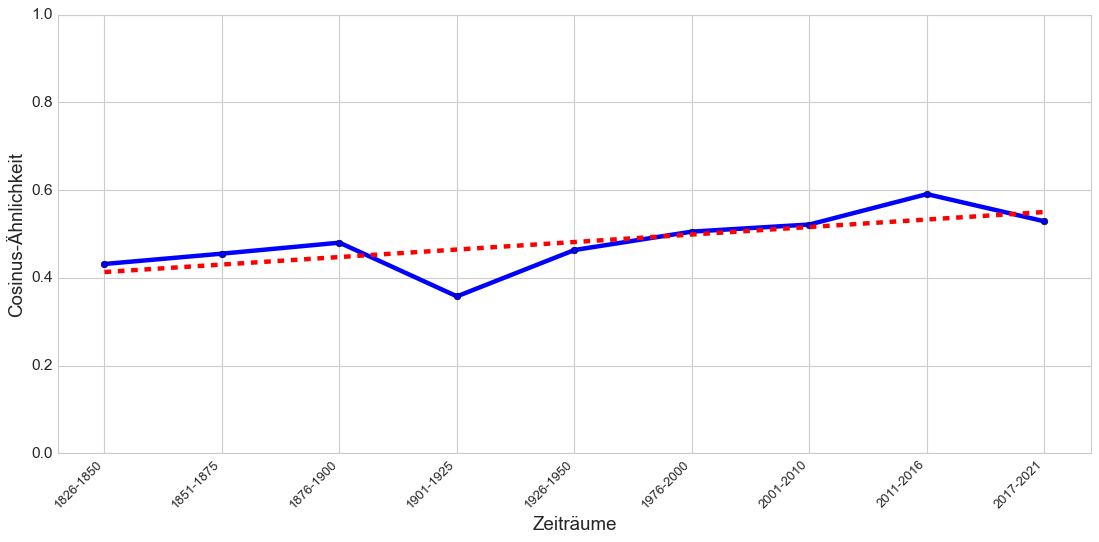

In [36]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'formidabilmente', 'molto')
x_indexes = np.arange(len(data))
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)
plt.plot(x_indexes, data.values(), label='atrocemente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

In [37]:
formidabilmente1 = compare_cos(periods, models, 'formidabilmente', 'angoscia')
formidabilmente2 = compare_cos(periods, models, 'formidabilmente', 'atterrire')
formidabilmente3 = compare_cos(periods, models, 'formidabilmente', 'panico')
formidabilmente4 = compare_cos(periods, models, 'formidabilmente', 'paura')
formidabilmente5 = compare_cos(periods, models, 'formidabilmente', 'raccapricciare')
formidabilmente6 = compare_cos(periods, models, 'formidabilmente', 'schifo')
formidabilmente7 = compare_cos(periods, models, 'formidabilmente', 'sgomentare')
formidabilmente8 = compare_cos(periods, models, 'formidabilmente', 'sgomento')
formidabilmente9 = compare_cos(periods, models, 'formidabilmente', 'spaventare')
formidabilmente10 = compare_cos(periods, models, 'formidabilmente', 'spavento')
formidabilmente11 = compare_cos(periods, models, 'formidabilmente', 'terrore')

In [38]:
formidabilmente_df = pd.DataFrame([formidabilmente1, formidabilmente2, formidabilmente3, formidabilmente4, formidabilmente5, formidabilmente6, formidabilmente7, formidabilmente8, formidabilmente9, formidabilmente10, formidabilmente11])

# Durchschnitt pro Zeitraum
formidabilmente_mean = dict(formidabilmente_df.mean())

# min pro Zeitraum
formidabilmente_min = dict(formidabilmente_df.min())
formidabilmente_min_list = [float(x) for x in list(formidabilmente_min.values())]

#max pro Zeitraum 
formidabilmente_max = dict(formidabilmente_df.max())
formidabilmente_max_list = [float(x) for x in list(formidabilmente_max.values())]

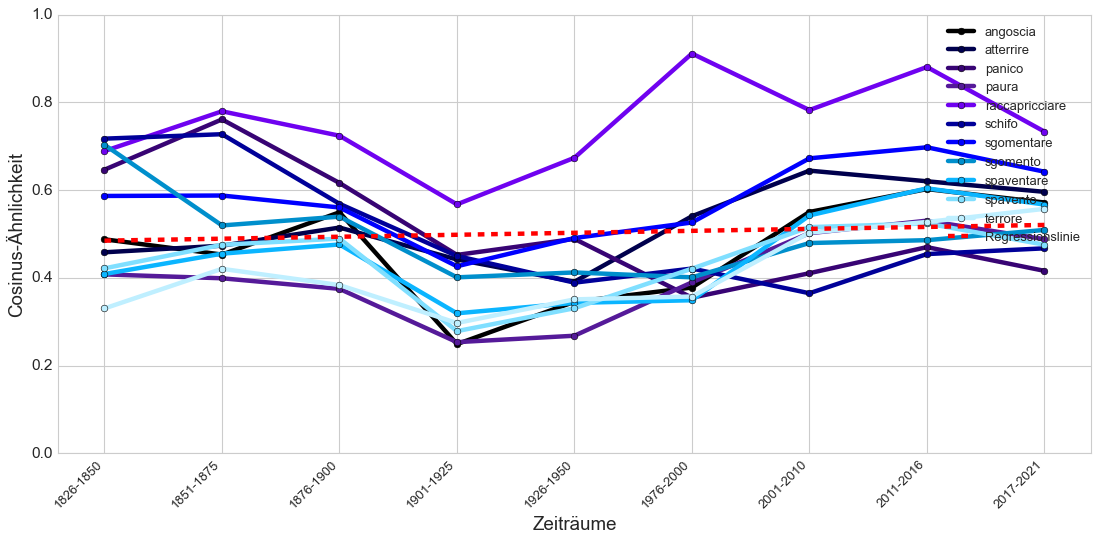

In [39]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(formidabilmente_mean)))
plt.xticks(ticks=x_indexes, labels=formidabilmente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, formidabilmente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, formidabilmente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, formidabilmente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, formidabilmente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, formidabilmente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, formidabilmente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, formidabilmente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, formidabilmente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, formidabilmente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, formidabilmente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, formidabilmente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, formidabilmente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(formidabilmente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

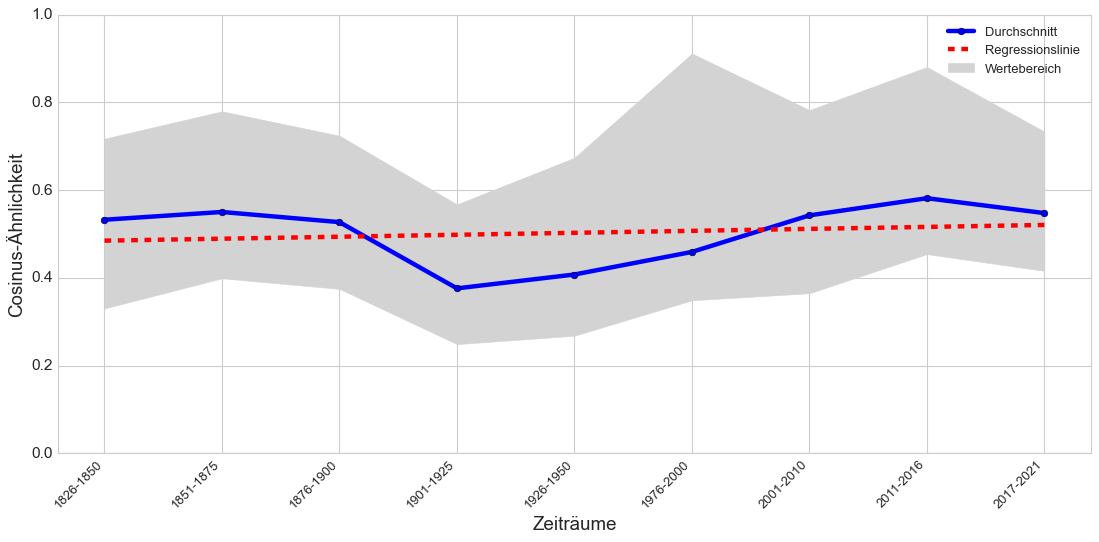

In [40]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(formidabilmente_mean)))
plt.xticks(ticks=x_indexes, labels=formidabilmente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, formidabilmente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, formidabilmente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, formidabilmente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, formidabilmente_max_list, formidabilmente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(formidabilmente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### mostruosamente

In [41]:
compare_words(periods, models, 'mostruosamente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1975,1976-2000,2001-2010,2011-2016,2017-2021
0,"(paventan, 0.9636729955673218)",not in vocab,"(laérte, 0.963860273361206)","(topiche, 0.9734346270561218)","(morboso, 0.9553850293159485)","(congegno, 0.8985509872436523)","(sognate, 0.8864034414291382)","(frontale, 0.8622192144393921)","(trepidamente, 0.9119396805763245)","(egoista, 0.8634977340698242)","(spaventosamente, 0.8205793499946594)","(incredibilmente, 0.8351675868034363)","(spaventosamente, 0.8420299291610718)"
1,"(sorridente, 0.9623982310295105)",not in vocab,"(damman, 0.9633772373199463)","(sussieguo, 0.9719809293746948)","(schiettezza, 0.9519172310829163)","(improvvisa, 0.8944514393806458)","(significazione, 0.8779020309448242)","(infocato, 0.8589755892753601)","(calpestar, 0.9070112109184265)","(dotato, 0.8534383177757263)","(coinvolgente, 0.8167524337768555)","(spaventosamente, 0.8277563452720642)","(talmente, 0.8177384734153748)"
2,"(furlanetta, 0.9614259600639343)",not in vocab,"(branda, 0.9631268978118896)","(megara, 0.9717816710472107)","(inorgoglire, 0.950655460357666)","(veemente, 0.8920531868934631)","(veggono, 0.8679993748664856)","(artigliata, 0.8546019196510315)","(problematiche, 0.9044170379638672)","(spaventosamente, 0.8461815118789673)","(geniale, 0.8045481443405151)","(straordinariamente, 0.8196353316307068)","(incredibilmente, 0.8000674843788147)"
3,"(citereggia, 0.960675060749054)",not in vocab,"(romba, 0.9626616835594177)","(giovera, 0.9708107113838196)","(diffidente, 0.9484642744064331)","(sensibilit, 0.8919309377670288)","(definibile, 0.8665401339530945)","(verisimile, 0.854339063167572)","(rincorrerne, 0.9022356271743774)","(eleganza, 0.8376547694206238)","(estremamente, 0.8027387857437134)","(talmente, 0.8163576722145081)","(tremendamente, 0.7979291677474976)"
4,"(concordie, 0.9606487154960632)",not in vocab,"(consigliommi, 0.9626092314720154)","(lemno, 0.9695108532905579)","(portentoso, 0.9484525322914124)","(sovrabbondanza, 0.8900903463363647)","(ingenerare, 0.8641602396965027)","(reticolare, 0.8534823656082153)","(pietismo, 0.9019726514816284)","(infinitamente, 0.8361186981201172)","(tremendamente, 0.7972805500030518)","(alquanto, 0.8121851086616516)","(terribilmente, 0.7809638381004333)"
5,"(ingolfarsi, 0.9606170058250427)",not in vocab,"(guardan, 0.9625619053840637)","(ignorate, 0.9689579010009766)","(incurabile, 0.9483717083930969)","(investigatore, 0.8893908262252808)","(miscuglio, 0.8585011959075928)","(legnose, 0.851082980632782)","(librettistici, 0.9019051790237427)","(orripilante, 0.8339404463768005)","(incredibilmente, 0.7971784472465515)","(leggerezza, 0.8060665726661682)","(crudo, 0.7785831689834595)"
6,"(guardatura, 0.9598687887191772)",not in vocab,"(offenderci, 0.9624488353729248)","(buscata, 0.9684188961982727)","(triviale, 0.9478040933609009)","(urtò, 0.8871975541114807)","(originare, 0.8578948974609375)","(spropositato, 0.8497678637504578)","(pietrificandole, 0.8998294472694397)","(sobrio, 0.8310768008232117)","(talmente, 0.7942774295806885)","(superficiale, 0.8008052706718445)","(cinico, 0.778415322303772)"
7,"(armaiolo, 0.9596836566925049)",not in vocab,"(motteggiarle, 0.9623711705207825)","(vei, 0.967625617980957)","(vanitoso, 0.9471924901008606)","(allettamento, 0.8868272304534912)","(impensabile, 0.8564552068710327)","(inquisitorio, 0.8496238589286804)","(sophia, 0.8974559307098389)","(arido, 0.8301655054092407)","(alquanto, 0.7935407161712646)","(accattivante, 0.7982064485549927)","(innocuo, 0.7625585198402405)"
8,"(esagerarle, 0.9592943787574768)",not in vocab,"(sacrò, 0.9620772004127502)","(amarezze, 0.966995120048523)","(alterigia, 0.9467923045158386)","(impudenza, 0.8848101496696472)","(rappresentandocene, 0.854120671749115)","(smilze, 0.8483821153640747)","(fatalista, 0.8974422812461853)","(humour, 0.830162763595581)","(crudo, 0.7930499911308289)","(sensuale, 0.7957310080528259)","(genuino, 0.7616631984710693)"
9,"(quista, 0.959

In [42]:
compare_cos(periods, models, 'mostruosamente', 'molto')

{'1700-1750': 0.3967425227165222,
 '1801-1825': 0.5030770897865295,
 '1826-1850': 0.4459156095981598,
 '1851-1875': 0.594621479511261,
 '1876-1900': 0.5039764642715454,
 '1901-1925': 0.4399569034576416,
 '1926-1950': 0.3409119248390198,
 '1951-1975': 0.49529948830604553,
 '1976-2000': 0.6166523098945618,
 '2001-2010': 0.6421700716018677,
 '2011-2016': 0.6623972654342651,
 '2017-2021': 0.5886260867118835}

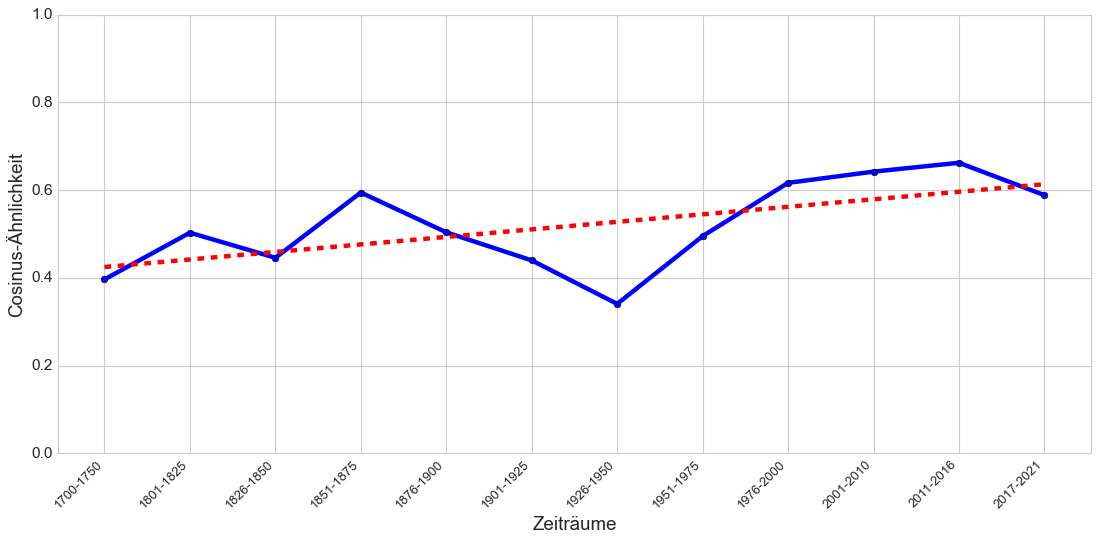

In [43]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'mostruosamente', 'molto')
x_indexes = np.arange(len(data))
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)
plt.plot(x_indexes, data.values(), label='mostruosamente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

In [44]:
mostruosamente1 = compare_cos(periods, models, 'mostruosamente', 'angoscia')
mostruosamente2 = compare_cos(periods, models, 'mostruosamente', 'atterrire')
mostruosamente3 = compare_cos(periods, models, 'mostruosamente', 'panico')
mostruosamente4 = compare_cos(periods, models, 'mostruosamente', 'paura')
mostruosamente5 = compare_cos(periods, models, 'mostruosamente', 'raccapricciare')
mostruosamente6 = compare_cos(periods, models, 'mostruosamente', 'schifo')
mostruosamente7 = compare_cos(periods, models, 'mostruosamente', 'sgomentare')
mostruosamente8 = compare_cos(periods, models, 'mostruosamente', 'sgomento')
mostruosamente9 = compare_cos(periods, models, 'mostruosamente', 'spaventare')
mostruosamente10 = compare_cos(periods, models, 'mostruosamente', 'spavento')
mostruosamente11 = compare_cos(periods, models, 'mostruosamente', 'terrore')

In [45]:
mostruosamente_df = pd.DataFrame([mostruosamente1, mostruosamente2, mostruosamente3, mostruosamente4, mostruosamente5, mostruosamente6, mostruosamente7, mostruosamente8, mostruosamente9, mostruosamente10, mostruosamente11])

# Durchschnitt pro Zeitraum
mostruosamente_mean = dict(mostruosamente_df.mean())

# min pro Zeitraum
mostruosamente_min = dict(mostruosamente_df.min())
mostruosamente_min_list = [float(x) for x in list(mostruosamente_min.values())]

#max pro Zeitraum 
mostruosamente_max = dict(mostruosamente_df.max())
mostruosamente_max_list = [float(x) for x in list(mostruosamente_max.values())]

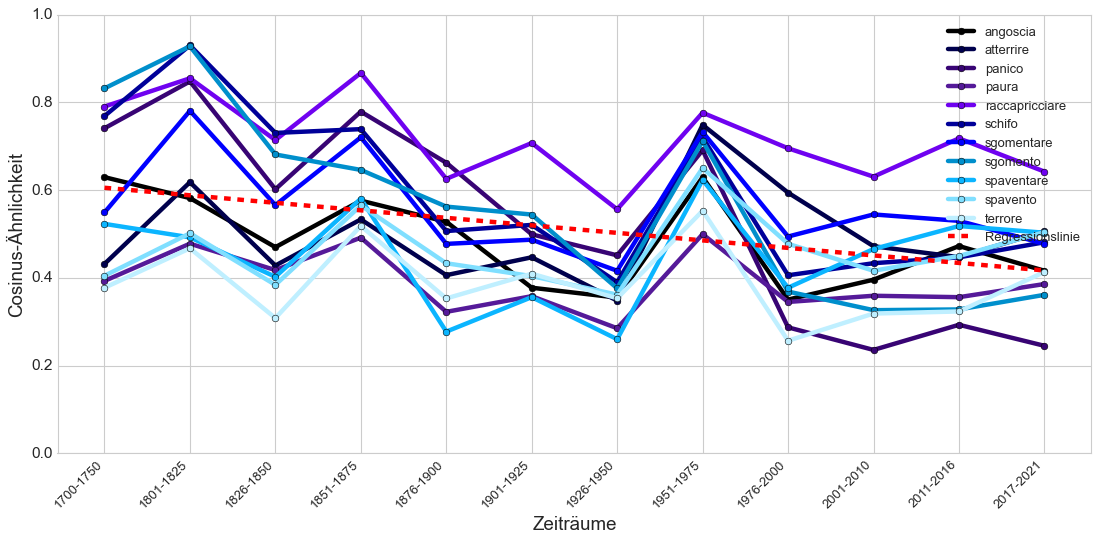

In [46]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(mostruosamente_mean)))
plt.xticks(ticks=x_indexes, labels=mostruosamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, mostruosamente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, mostruosamente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, mostruosamente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, mostruosamente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, mostruosamente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, mostruosamente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, mostruosamente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, mostruosamente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, mostruosamente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, mostruosamente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, mostruosamente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, mostruosamente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(mostruosamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

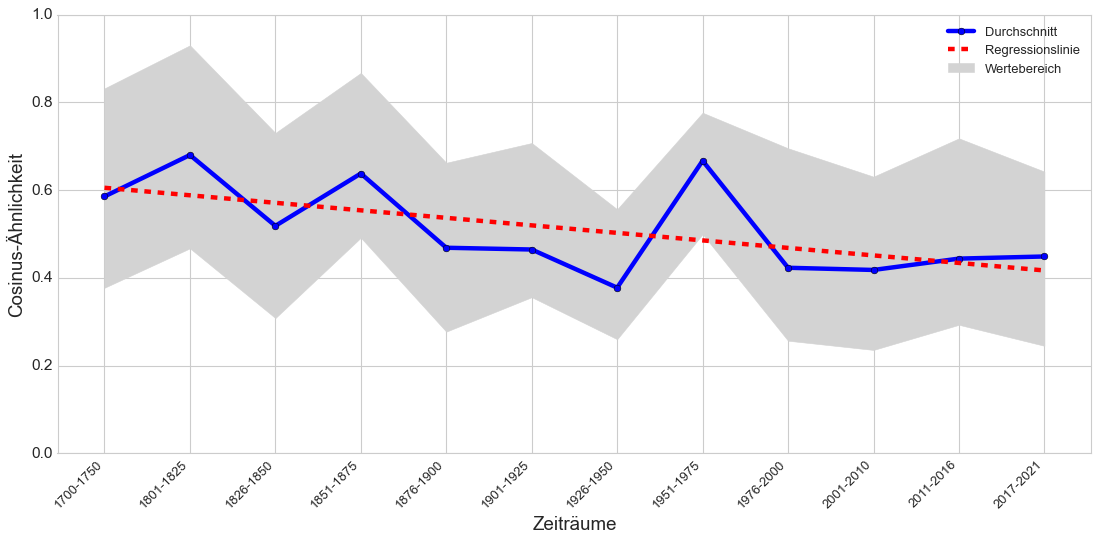

In [47]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(mostruosamente_mean)))
plt.xticks(ticks=x_indexes, labels=mostruosamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, mostruosamente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, mostruosamente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, mostruosamente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, mostruosamente_max_list, mostruosamente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(mostruosamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### orrendamente

In [48]:
compare_words(periods, models, 'orrendamente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1975,1976-2000,2001-2010,2011-2016,2017-2021
0,"(fidossi, 0.96759033203125)",not in vocab,"(nugolo, 0.9472218751907349)","(pasce, 0.9460265636444092)","(inumidire, 0.9498053789138794)","(imporporare, 0.8733888864517212)","(ruggiva, 0.8424012064933777)","(agitarti, 0.8466143608093262)","(fulminato, 0.9507849216461182)","(mutilare, 0.9073293209075928)","(mutilare, 0.8777994513511658)","(mutilare, 0.9111844897270203)","(orribilmente, 0.8837073445320129)"
1,"(sfrondare, 0.962894856929779)",not in vocab,"(ondeggiante, 0.9388868808746338)","(aggirar, 0.9442479610443115)","(vampa, 0.9379361867904663)","(tetra, 0.8705983757972717)","(mutilare, 0.8421083092689514)","(longwy, 0.839809000492096)","(accomodatutto, 0.9496397972106934)","(orribilmente, 0.8903392553329468)","(orribilmente, 0.8775120973587036)","(orribilmente, 0.8886086940765381)","(mutilare, 0.8748930096626282)"
2,"(edmaniera, 0.9625263810157776)",not in vocab,"(monotono, 0.9376651644706726)","(disperamente, 0.9418715238571167)","(sanguigno, 0.9326626658439636)","(arsura, 0.8705105185508728)","(felino, 0.8400084376335144)","(soppiatto, 0.8377137780189514)","(capretta, 0.9494718313217163)","(sfigurato, 0.8749125003814697)","(atrocemente, 0.8371847867965698)","(sfigurato, 0.8590672016143799)","(sfigurare, 0.8646392822265625)"
3,"(provegga, 0.962358295917511)",not in vocab,"(rene, 0.934227705001831)","(salvatico, 0.9414495229721069)","(tinto, 0.9315785765647888)","(appannare, 0.8704657554626465)","(scongiurandomi, 0.8336054086685181)","(acconciate, 0.835178017616272)","(inaridì, 0.9493176341056824)","(straziato, 0.859898030757904)","(sfigurato, 0.8338091969490051)","(straziare, 0.8436235189437866)","(sfigurato, 0.8489149808883667)"
4,"(diconsi, 0.9621860384941101)",not in vocab,"(arcoli, 0.9338073134422302)","(estranie, 0.9400297403335571)","(vellutato, 0.9307224154472351)","(sbiancare, 0.8686831593513489)","(stramazzare, 0.8272678256034851)","(spensieratamente, 0.8345690369606018)","(mugnai, 0.9480001330375671)","(sfigurati, 0.8458948731422424)","(sfigurare, 0.8293813467025757)","(sfigurare, 0.8309066295623779)","(straziato, 0.8394197821617126)"
5,"(ascondersi, 0.9609431624412537)",not in vocab,"(spezzato, 0.932696521282196)","(erebo, 0.9376348853111267)","(smorto, 0.92847740650177)","(corvino, 0.866129994392395)","(ventre, 0.8238571882247925)","(prude, 0.833525538444519)","(yaght, 0.9471110105514526)","(mutilato, 0.8458612561225891)","(torturare, 0.8128154873847961)","(torturare, 0.8211978077888489)","(atrocemente, 0.8286978006362915)"
6,"(ammansire, 0.9603509306907654)",not in vocab,"(giumento, 0.9324097037315369)","(versa, 0.9369552731513977)","(gonfiare, 0.92792809009552)","(dimagrire, 0.8632808923721313)","(contraffatto, 0.819297730922699)","(argonne, 0.8300490379333496)","(prosternare, 0.9470783472061157)","(ustionato, 0.8254576921463013)","(deturpare, 0.8108466267585754)","(atrocemente, 0.8179689049720764)","(serpente, 0.8131200671195984)"
7,"(argenteria, 0.9598331451416016)",not in vocab,"(tristamente, 0.931652307510376)","(allegr, 0.9369475841522217)","(lampeggiare, 0.9277138113975525)","(pallor, 0.862041175365448)","(sbranare, 0.814577043056488)","(incuteresti, 0.8123247623443604)","(banana, 0.946842610836029)","(cadavere, 0.8161200284957886)","(straziato, 0.7933101058006287)","(bestia, 0.8146165609359741)","(seviziare, 0.8015781044960022)"
8,"(rascuotere, 0.9593815207481384)",not in vocab,"(pendenti, 0.9313560128211975)","(ispaventose, 0.9365607500076294)","(scintillanti, 0.9241507053375244)","(stecchire, 0.8619248270988464)","(buttatasi, 0.8118153810501099)","(giocondamente, 0.8098375201225281)","(accasciato, 0.9467779994010925)","(sfigurare, 0.8141632676124573)","(killer, 0.7778664827346802)","(atterrite, 0.8125335574150085)","(atterrita, 0.7986201047897339)"
9,"(tolselo, 0.9593691825866699)",not in vocab,"(scura, 0.9313442707061768)","(commova, 0.936354398727417)","(sfavillare, 

In [49]:
compare_cos(periods, models, 'orrendamente', 'molto')

{'1700-1750': 0.41009601950645447,
 '1801-1825': 0.45968204736709595,
 '1826-1850': 0.3967507481575012,
 '1851-1875': 0.4254589378833771,
 '1876-1900': 0.433671772480011,
 '1901-1925': 0.2983080744743347,
 '1926-1950': 0.2659560739994049,
 '1951-1975': 0.3368145525455475,
 '1976-2000': 0.2151830643415451,
 '2001-2010': 0.32483792304992676,
 '2011-2016': 0.30854350328445435,
 '2017-2021': 0.3568192422389984}

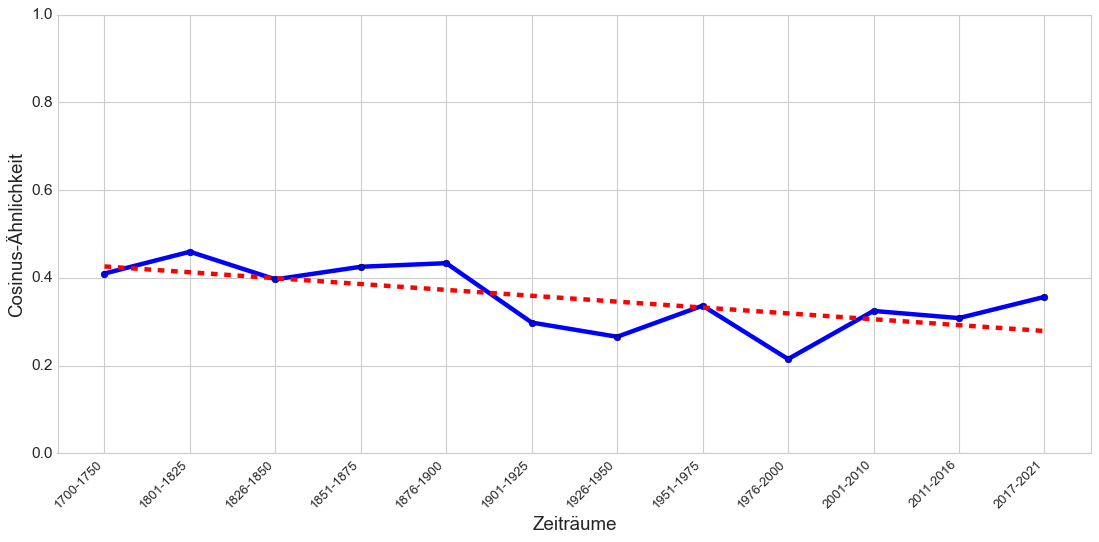

In [50]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'orrendamente', 'molto')
x_indexes = np.arange(len(data))
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)
plt.plot(x_indexes, data.values(), label='orrendamente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

In [51]:
orrendamente1 = compare_cos(periods, models, 'orrendamente', 'angoscia')
orrendamente2 = compare_cos(periods, models, 'orrendamente', 'atterrire')
orrendamente3 = compare_cos(periods, models, 'orrendamente', 'panico')
orrendamente4 = compare_cos(periods, models, 'orrendamente', 'paura')
orrendamente5 = compare_cos(periods, models, 'orrendamente', 'raccapricciare')
orrendamente6 = compare_cos(periods, models, 'orrendamente', 'schifo')
orrendamente7 = compare_cos(periods, models, 'orrendamente', 'sgomentare')
orrendamente8 = compare_cos(periods, models, 'orrendamente', 'sgomento')
orrendamente9 = compare_cos(periods, models, 'orrendamente', 'spaventare')
orrendamente10 = compare_cos(periods, models, 'orrendamente', 'spavento')
orrendamente11 = compare_cos(periods, models, 'orrendamente', 'terrore')

In [52]:
orrendamente_df = pd.DataFrame([orrendamente1, orrendamente2, orrendamente3, orrendamente4, orrendamente5, orrendamente6, orrendamente7, orrendamente8, orrendamente9, orrendamente10, orrendamente11])

# Durchschnitt pro Zeitraum
orrendamente_mean = dict(orrendamente_df.mean())

# min pro Zeitraum
orrendamente_min = dict(orrendamente_df.min())
orrendamente_min_list = [float(x) for x in list(orrendamente_min.values())]

#max pro Zeitraum 
orrendamente_max = dict(orrendamente_df.max())
orrendamente_max_list = [float(x) for x in list(orrendamente_max.values())]

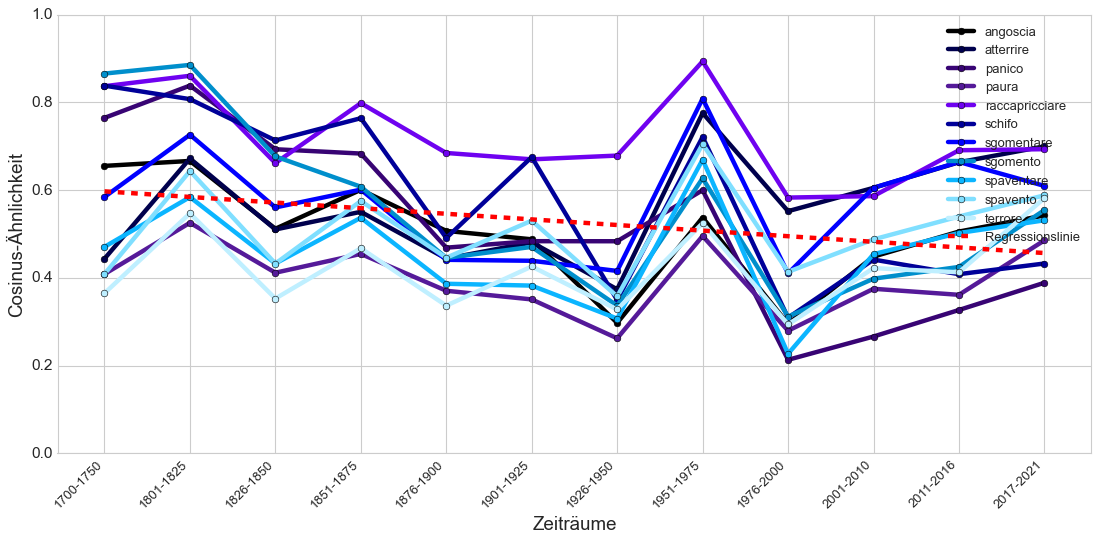

In [53]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(orrendamente_mean)))
plt.xticks(ticks=x_indexes, labels=orrendamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, orrendamente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, orrendamente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, orrendamente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, orrendamente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, orrendamente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, orrendamente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, orrendamente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, orrendamente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, orrendamente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, orrendamente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, orrendamente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, orrendamente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(orrendamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

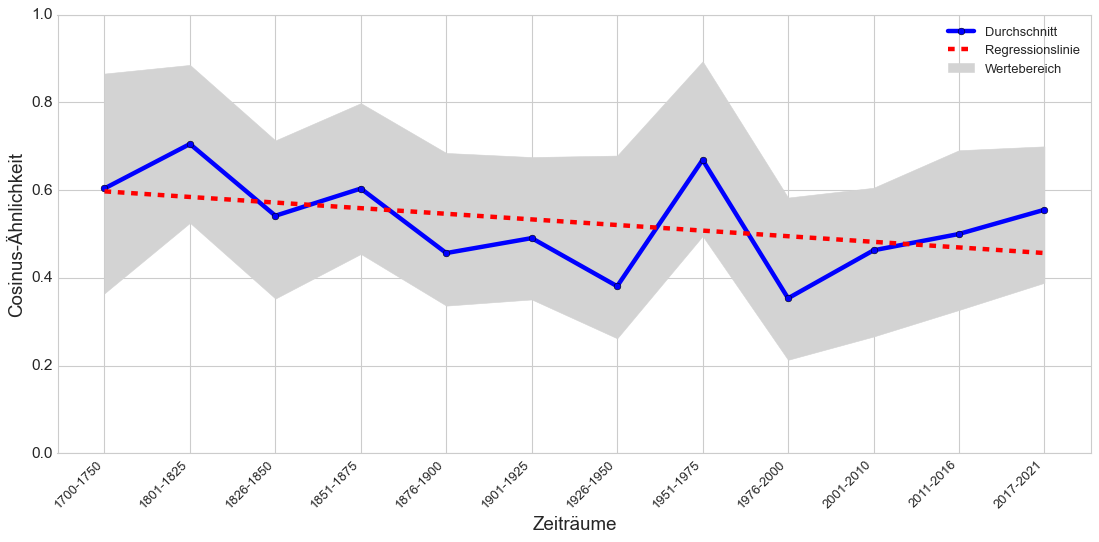

In [54]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(orrendamente_mean)))
plt.xticks(ticks=x_indexes, labels=orrendamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, orrendamente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, orrendamente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, orrendamente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, orrendamente_max_list, orrendamente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(orrendamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### orribilmente

In [55]:
compare_words(periods, models, 'orribilmente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1975,1976-2000,2001-2010,2011-2016,2017-2021
0,"(aquilonar, 0.893123209476471)","(frangere, 0.9204424023628235)","(mischia, 0.8875011205673218)","(rupe, 0.8748340010643005)","(pallore, 0.8965504765510559)","(contrazione, 0.6956614255905151)","(orrendamente, 0.6867417693138123)","(spaventosamente, 0.7186195850372314)","(trabocchetto, 0.8544204235076904)","(mutilare, 0.9008229374885559)","(orrendamente, 0.8775121569633484)","(orrendamente, 0.8886086940765381)","(orrendamente, 0.8837073445320129)"
1,"(rugge, 0.8882024884223938)","(fischiare, 0.9139747619628906)","(esalare, 0.8863797187805176)","(fracassare, 0.85593181848526)","(tremito, 0.8584299683570862)","(arteria, 0.69228595495224)","(zuccone, 0.6839848160743713)","(indurire, 0.7129325270652771)","(immoto, 0.8529120087623596)","(orrendamente, 0.8903392553329468)","(atrocemente, 0.8389376997947693)","(sfigurato, 0.8316743969917297)","(atrocemente, 0.8376427292823792)"
2,"(fischiare, 0.8768795728683472)","(sciame, 0.9118013381958008)","(fremito, 0.8853631615638733)","(boscaglia, 0.8531347513198853)","(gonfiare, 0.8546802401542664)","(oppresso, 0.6888021230697632)","(ruggiva, 0.6837207078933716)","(nudità, 0.7111249566078186)","(puzzo, 0.8449518084526062)","(sfigurato, 0.8871998190879822)","(mutilare, 0.8064841032028198)","(mutilare, 0.8295196294784546)","(sfigurare, 0.8373699188232422)"
3,"(grandine, 0.874954879283905)","(squallido, 0.9100205302238464)","(primiero, 0.8842469453811646)","(bomba, 0.8496890068054199)","(rantolo, 0.8546794652938843)","(mutilare, 0.688396692276001)","(impallidì, 0.681404709815979)","(cadaverico, 0.7107494473457336)","(pesto, 0.8389780521392822)","(straziato, 0.8724735975265503)","(sfigurare, 0.7863731980323792)","(atrocemente, 0.8123722672462463)","(mutilare, 0.8279662728309631)"
4,"(rabbioso, 0.8745424151420593)","(troncato, 0.9053886532783508)","(sudor, 0.8841627240180969)","(brancolare, 0.8484875559806824)","(livido, 0.8529807925224304)","(corpicino, 0.6837156414985657)","(annojata, 0.6612998843193054)","(visetto, 0.710335373878479)","(pozza, 0.8366312384605408)","(mutilato, 0.8514002561569214)","(torturare, 0.7732071280479431)","(bestia, 0.79762864112854)","(sfigurato, 0.8121681213378906)"
5,"(turbin, 0.8727374076843262)","(agonia, 0.9050772190093994)","(sospir, 0.8828933238983154)","(siepe, 0.8448127508163452)","(convulso, 0.8506579995155334)","(paralitico, 0.6816229224205017)","(rabbuffata, 0.6559953093528748)","(incomposto, 0.7101137042045593)","(pera, 0.836042046546936)","(sfigurare, 0.8479439616203308)","(sfigurato, 0.7602709531784058)","(straziare, 0.7742487788200378)","(straziato, 0.7918874621391296)"
6,"(cada, 0.8720307946205139)","(vasello, 0.9049100875854492)","(giumento, 0.8828542828559875)","(serpeggiare, 0.8436645269393921)","(vampa, 0.848081648349762)","(membra, 0.6810601949691772)","(soffrire, 0.6558253765106201)","(madlen, 0.7089581489562988)","(occhiaia, 0.8343255519866943)","(sfigurati, 0.8469644784927368)","(unghia, 0.7470893263816833)","(oltraggiare, 0.7696150541305542)","(seviziare, 0.7748684287071228)"
7,"(aquilon, 0.870933473110199)","(antenna, 0.903274655342102)","(venìa, 0.8827521204948425)","(scoglio, 0.8434922099113464)","(orrendamente, 0.8474010229110718)","(stravolto, 0.6773844361305237)","(mutilare, 0.6555502414703369)","(ruvido, 0.7087979912757874)","(laceri, 0.8340445160865784)","(ustionato, 0.8364210724830627)","(cranio, 0.746716320514679)","(sfigurare, 0.7682995200157166)","(serpente, 0.7702755928039551)"
8,"(flutti, 0.8707581162452698)","(teso, 0.9029768705368042)","(sopor, 0.8821589350700378)","(sabbia, 0.8428871631622314)","(guancie, 0.8422033190727234)","(sordamente, 0.6770179271697998)","(atrocemente, 0.6523357629776001)","(rantolare, 0.70808345079422)","(guard, 0.8315718770027161)","(stuprare, 0.83305424451828)","(deturpare, 0.7439101338386536)","(demonio, 0.7644504308700562)","(torturare, 0.7699769735336304)"
9,"(procell

In [56]:
compare_cos(periods, models, 'orribilmente', 'molto')

{'1700-1750': 0.3020729124546051,
 '1751-1800': 0.41227665543556213,
 '1801-1825': 0.43813788890838623,
 '1826-1850': 0.36770713329315186,
 '1851-1875': 0.41518452763557434,
 '1876-1900': 0.4422455430030823,
 '1901-1925': 0.2892683744430542,
 '1926-1950': 0.3765222728252411,
 '1951-1975': 0.33445996046066284,
 '1976-2000': 0.34966591000556946,
 '2001-2010': 0.39063090085983276,
 '2011-2016': 0.382655531167984,
 '2017-2021': 0.370770126581192}

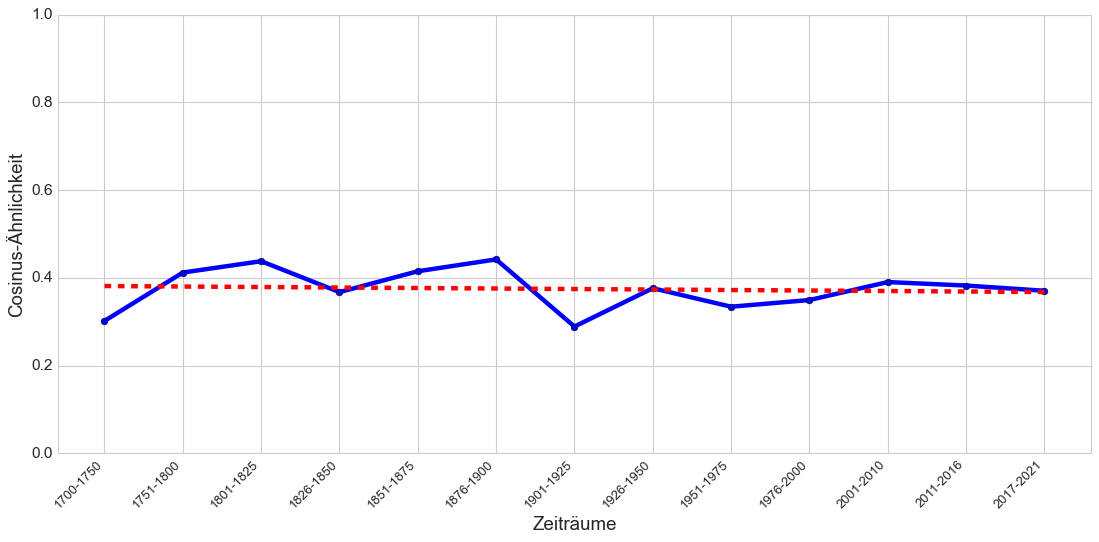

In [57]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'orribilmente', 'molto')
x_indexes = np.arange(len(data))
plt.ylim(0, 1)
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.plot(x_indexes, data.values(), label='orribilmente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

In [58]:
orribilmente1 = compare_cos(periods, models, 'orribilmente', 'angoscia')
orribilmente2 = compare_cos(periods, models, 'orribilmente', 'atterrire')
orribilmente3 = compare_cos(periods, models, 'orribilmente', 'panico')
orribilmente4 = compare_cos(periods, models, 'orribilmente', 'paura')
orribilmente5 = compare_cos(periods, models, 'orribilmente', 'raccapricciare')
orribilmente6 = compare_cos(periods, models, 'orribilmente', 'schifo')
orribilmente7 = compare_cos(periods, models, 'orribilmente', 'sgomentare')
orribilmente8 = compare_cos(periods, models, 'orribilmente', 'sgomento')
orribilmente9 = compare_cos(periods, models, 'orribilmente', 'spaventare')
orribilmente10 = compare_cos(periods, models, 'orribilmente', 'spavento')
orribilmente11 = compare_cos(periods, models, 'orribilmente', 'terrore')

In [59]:
orribilmente_df = pd.DataFrame([orribilmente1, orribilmente2, orribilmente3, orribilmente4, orribilmente5, orribilmente6, orribilmente7, orribilmente8, orribilmente9, orribilmente10, orribilmente11])

# Durchschnitt pro Zeitraum
orribilmente_mean = dict(orribilmente_df.mean())

# min pro Zeitraum
orribilmente_min = dict(orribilmente_df.min())
orribilmente_min_list = [float(x) for x in list(orribilmente_min.values())]

#max pro Zeitraum 
orribilmente_max = dict(orribilmente_df.max())
orribilmente_max_list = [float(x) for x in list(orribilmente_max.values())]

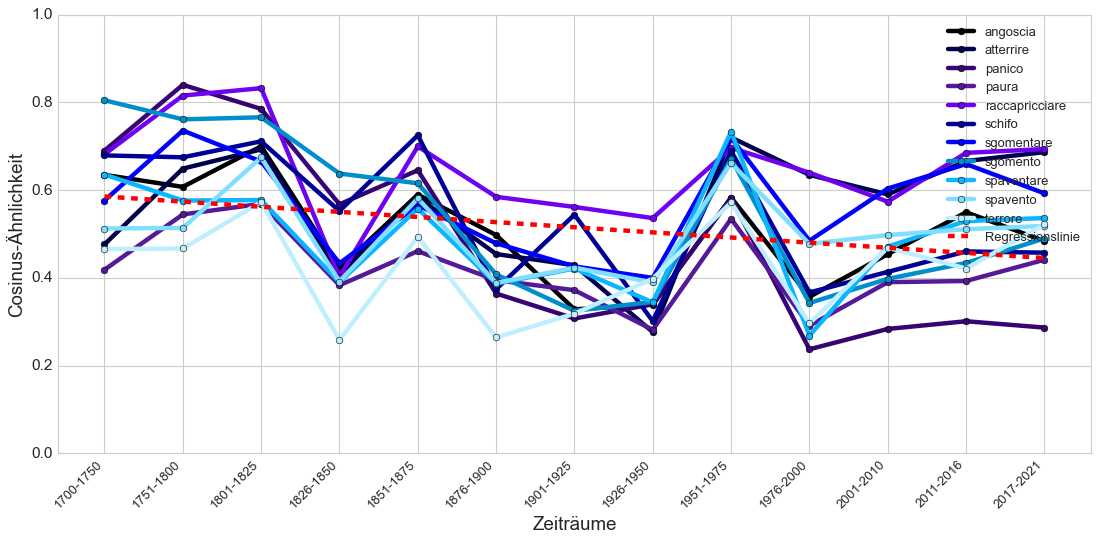

In [60]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(orribilmente_mean)))
plt.xticks(ticks=x_indexes, labels=orribilmente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, orribilmente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, orribilmente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, orribilmente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, orribilmente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, orribilmente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, orribilmente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, orribilmente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, orribilmente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, orribilmente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, orribilmente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, orribilmente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, orribilmente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(orribilmente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

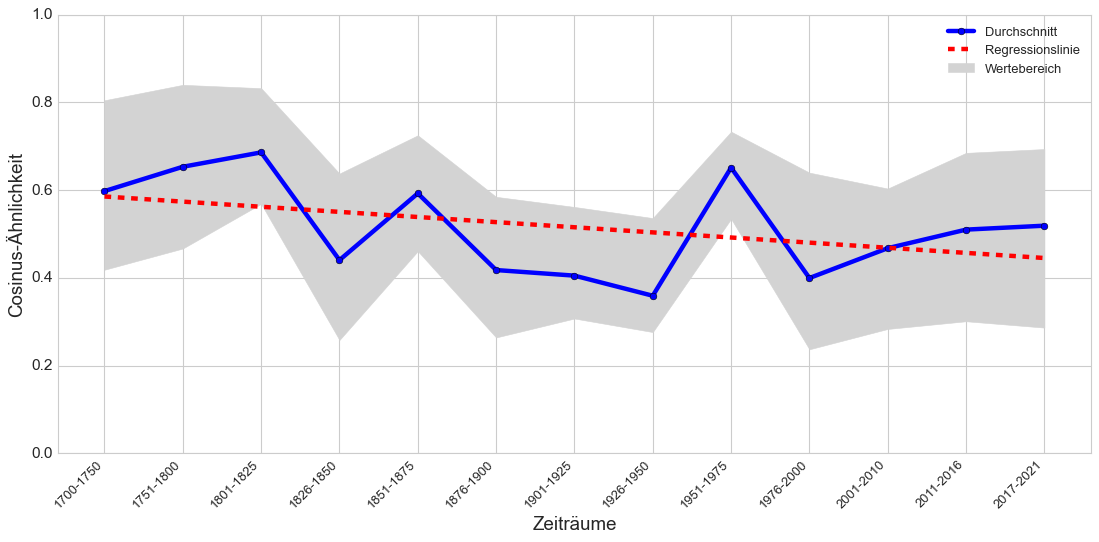

In [61]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(orribilmente_mean)))
plt.xticks(ticks=x_indexes, labels=orribilmente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, orribilmente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, orribilmente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, orribilmente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, orribilmente_max_list, orribilmente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(orribilmente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### spaventosamente

In [62]:
compare_words(periods, models, 'spaventosamente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1975,1976-2000,2001-2010,2011-2016,2017-2021
0,"(pestilenza, 0.9008229374885559)","(scordasti, 0.9724743962287903)","(schiuma, 0.97768634557724)","(beffato, 0.9721071720123291)","(fioccare, 0.9283667206764221)","(annebbiare, 0.8517158627510071)","(ruggiva, 0.7888373136520386)","(sbarrato, 0.7932720184326172)","(immoto, 0.7822480201721191)","(arido, 0.8501205444335938)","(mostruosamente, 0.8205793499946594)","(mostruosamente, 0.8277562260627747)","(mostruosamente, 0.8420299291610718)"
1,"(goletta, 0.8737515807151794)","(salìa, 0.9693432450294495)","(armille, 0.9775379300117493)","(ostrica, 0.9689648151397705)","(gragnuola, 0.9278318285942078)","(vibrazione, 0.8419197797775269)","(livido, 0.7873323559761047)","(vitreo, 0.7886936664581299)","(dissanguare, 0.7821292877197266)","(mostruosamente, 0.8461815118789673)","(orribilmente, 0.7262002825737)","(talmente, 0.7899394035339355)","(incredibilmente, 0.8247208595275879)"
2,"(kalemberg, 0.8729557991027832)","(priv, 0.966480553150177)","(avaria, 0.9764487743377686)","(scorrente, 0.9685812592506409)","(imperversare, 0.9249905943870544)","(torpore, 0.8376081585884094)","(madido, 0.7780046463012695)","(stravolto, 0.7856454849243164)","(fanciullezza, 0.77872633934021)","(ignorante, 0.8263874650001526)","(tremendamente, 0.722166895866394)","(superficiale, 0.774422287940979)","(talmente, 0.8048376441001892)"
3,"(impreso, 0.8676096796989441)","(vagante, 0.9637266993522644)","(spezzate, 0.9758645296096802)","(cadavero, 0.9680814146995544)","(vomitare, 0.9225347638130188)","(insensibile, 0.8333751559257507)","(felino, 0.7571563124656677)","(spalancati, 0.7846413254737854)","(spropositatamente, 0.7781842947006226)","(superficie, 0.825614869594574)","(spettro, 0.720659613609314)","(incredibilmente, 0.7697162628173828)","(terribilmente, 0.7923072576522827)"
4,"(moria, 0.8666674494743347)","(aleggiare, 0.9636533260345459)","(rodente, 0.9752240180969238)","(millantate, 0.9678890109062195)","(levossi, 0.9211400747299194)","(veemente, 0.8315955996513367)","(fiotto, 0.750262975692749)","(dilatati, 0.7798303961753845)","(neanderthal, 0.7764016389846802)","(infinitamente, 0.8208345174789429)","(invisibile, 0.717936635017395)","(sfumatura, 0.7669928669929504)","(tremendamente, 0.7768694162368774)"
5,"(strigonia, 0.8663820624351501)","(voleanlo, 0.9633899331092834)","(saliro, 0.9751448631286621)","(nellampia, 0.9669850468635559)","(capitombolare, 0.9198015928268433)","(sopore, 0.8265829086303711)","(gelido, 0.7502305507659912)","(gota, 0.7795367240905762)","(adolescente, 0.7751221060752869)","(gradevole, 0.8204410672187805)","(terribilmente, 0.7013365030288696)","(umido, 0.7658140063285828)","(assai, 0.7589390277862549)"
6,"(nicomedia, 0.8657159805297852)","(emenderanno, 0.9630703926086426)","(porien, 0.9748735427856445)","(stancata, 0.9666486978530884)","(fornace, 0.9197295904159546)","(vertiginoso, 0.8264590501785278)","(cadaverico, 0.7490662932395935)","(fiammella, 0.7769167423248291)","(bruciato, 0.775066614151001)","(irreale, 0.8199609518051147)","(straordinariamente, 0.7003015875816345)","(magro, 0.757595419883728)","(estremamente, 0.7534013390541077)"
7,"(tesino, 0.8654090762138367)","(notturne, 0.9629241824150085)","(taumanzii, 0.9748207926750183)","(strofinio, 0.9664743542671204)","(fiumana, 0.9185625314712524)","(stravolgere, 0.8238725066184998)","(percossa, 0.74570232629776)","(smorto, 0.7749252915382385)","(denutrito, 0.7726225852966309)","(sobrio, 0.8175438642501831)","(apparentemente, 0.6991618871688843)","(tinta, 0.7550017237663269)","(eccessivamente, 0.7503821849822998)"
8,"(eruzione, 0.8643434643745422)","(tingesti, 0.9626489877700806)","(placaro, 0.9748202562332153)","(passeri, 0.9662558436393738)","(corsiero, 0.9184196591377258)","(fiaccare, 0.822862446308136)","(disfatti, 0.7420163154602051)","(dilatate, 0.7737903594970703)","(intiero, 0.7720340490341187)","(inesorabile, 0.8174420595169067)","(incred

In [63]:
compare_cos(periods, models, 'spaventosamente', 'molto')

{'1700-1750': 0.3892567753791809,
 '1751-1800': 0.4441823959350586,
 '1801-1825': 0.41615134477615356,
 '1826-1850': 0.4625568687915802,
 '1851-1875': 0.4331013262271881,
 '1876-1900': 0.4510182738304138,
 '1901-1925': 0.3403697907924652,
 '1926-1950': 0.34287095069885254,
 '1951-1975': 0.4471583068370819,
 '1976-2000': 0.6285715103149414,
 '2001-2010': 0.5650334358215332,
 '2011-2016': 0.5657539963722229,
 '2017-2021': 0.5984463691711426}

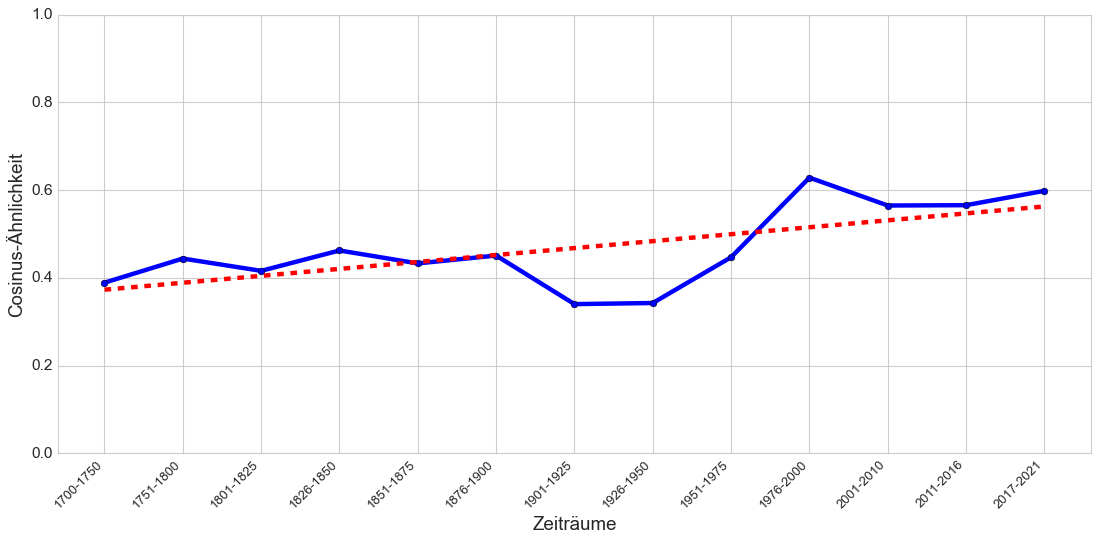

In [86]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'spaventosamente', 'molto')
x_indexes = np.arange(len(data))
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)
plt.plot(x_indexes, data.values(), label='spaventosamente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

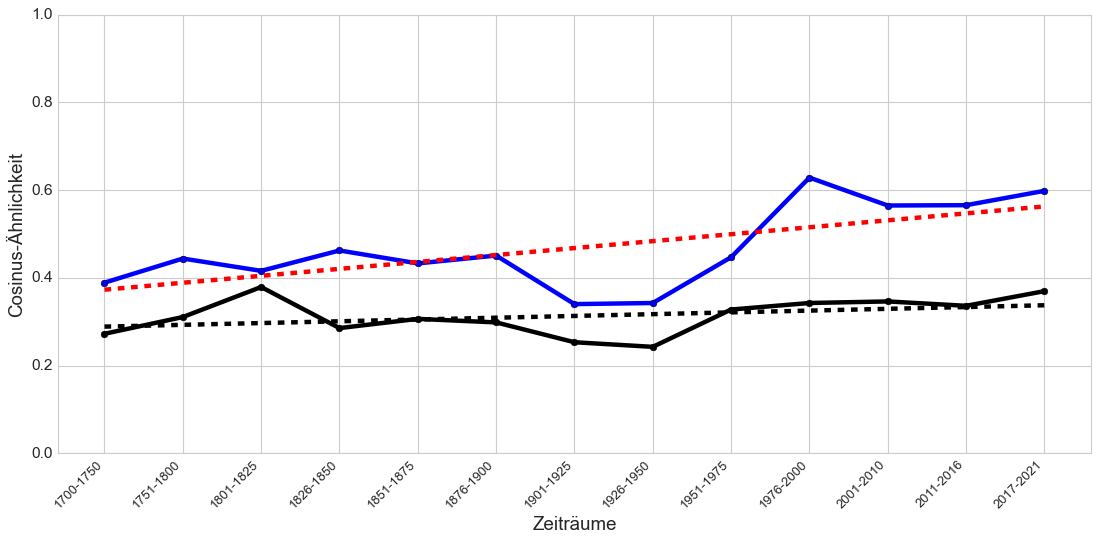

In [87]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'spaventosamente', 'molto')
x_indexes = np.arange(len(data))
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)
plt.plot(x_indexes, data.values(), label='spaventosamente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

# Kontrollgruppe
plt.plot(x_indexes, molto_mean.values(), label='Kontrollgruppe', marker='o', color='black')
coef = np.polyfit(x_indexes, list(molto_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), linestyle='--', color='black')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

In [65]:
spaventosamente1 = compare_cos(periods, models, 'spaventosamente', 'angoscia')
spaventosamente2 = compare_cos(periods, models, 'spaventosamente', 'atterrire')
spaventosamente3 = compare_cos(periods, models, 'spaventosamente', 'panico')
spaventosamente4 = compare_cos(periods, models, 'spaventosamente', 'paura')
spaventosamente5 = compare_cos(periods, models, 'spaventosamente', 'raccapricciare')
spaventosamente6 = compare_cos(periods, models, 'spaventosamente', 'schifo')
spaventosamente7 = compare_cos(periods, models, 'spaventosamente', 'sgomentare')
spaventosamente8 = compare_cos(periods, models, 'spaventosamente', 'sgomento')
spaventosamente9 = compare_cos(periods, models, 'spaventosamente', 'spaventare')
spaventosamente10 = compare_cos(periods, models, 'spaventosamente', 'spavento')
spaventosamente11 = compare_cos(periods, models, 'spaventosamente', 'terrore')

In [66]:
spaventosamente_df = pd.DataFrame([spaventosamente1, spaventosamente2, spaventosamente3, spaventosamente4, spaventosamente5, spaventosamente6, spaventosamente7, spaventosamente8, spaventosamente9, spaventosamente10, spaventosamente11])

# Durchschnitt pro Zeitraum
spaventosamente_mean = dict(spaventosamente_df.mean())

# min pro Zeitraum
spaventosamente_min = dict(spaventosamente_df.min())
spaventosamente_min_list = [float(x) for x in list(spaventosamente_min.values())]

#max pro Zeitraum 
spaventosamente_max = dict(spaventosamente_df.max())
spaventosamente_max_list = [float(x) for x in list(spaventosamente_max.values())]

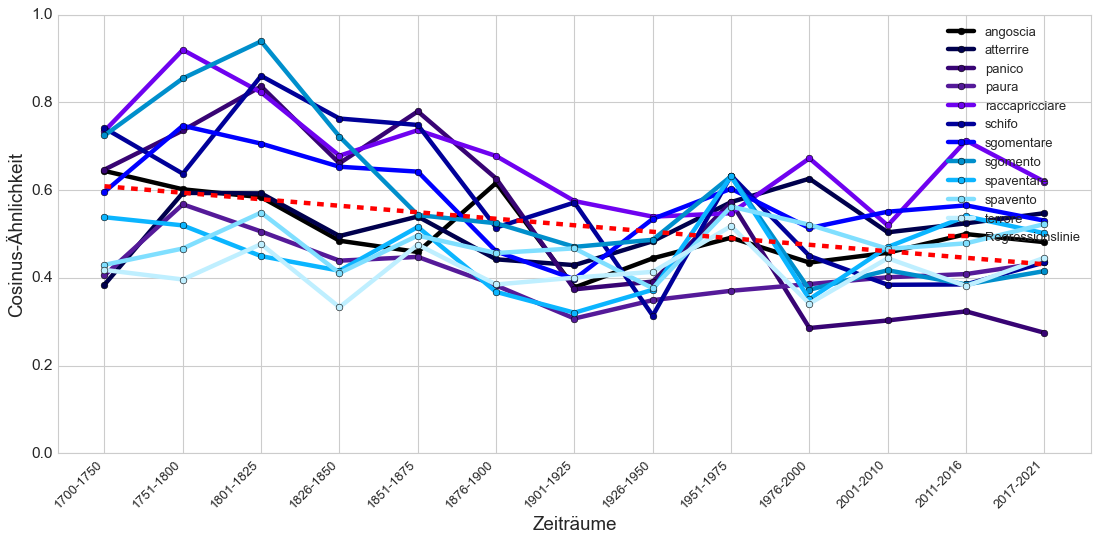

In [67]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(spaventosamente_mean)))
plt.xticks(ticks=x_indexes, labels=spaventosamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, spaventosamente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, spaventosamente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, spaventosamente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, spaventosamente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, spaventosamente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, spaventosamente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, spaventosamente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, spaventosamente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, spaventosamente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, spaventosamente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, spaventosamente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, spaventosamente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(spaventosamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

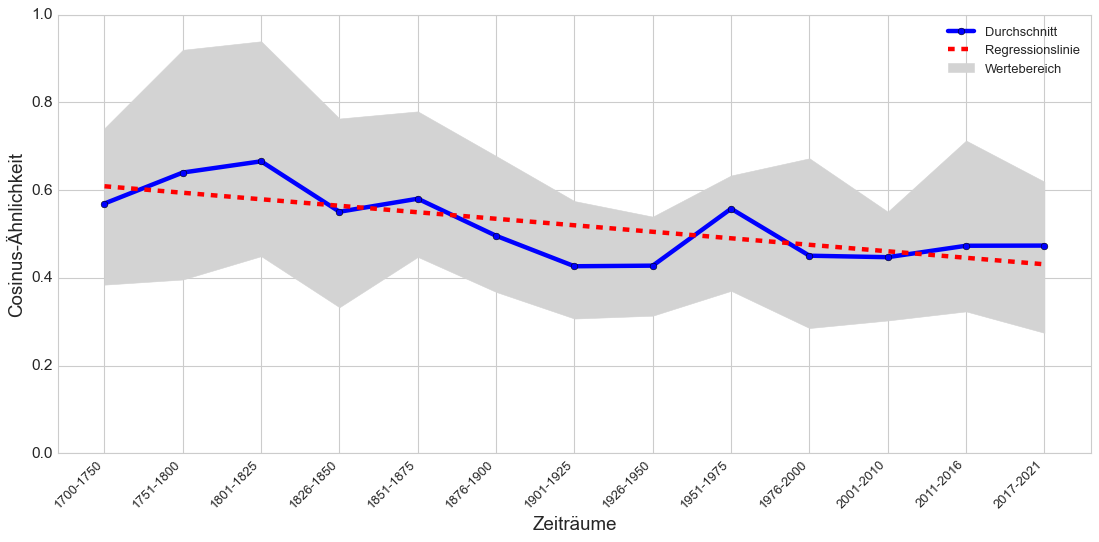

In [68]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(spaventosamente_mean)))
plt.xticks(ticks=x_indexes, labels=spaventosamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, spaventosamente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, spaventosamente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, spaventosamente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, spaventosamente_max_list, spaventosamente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(spaventosamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

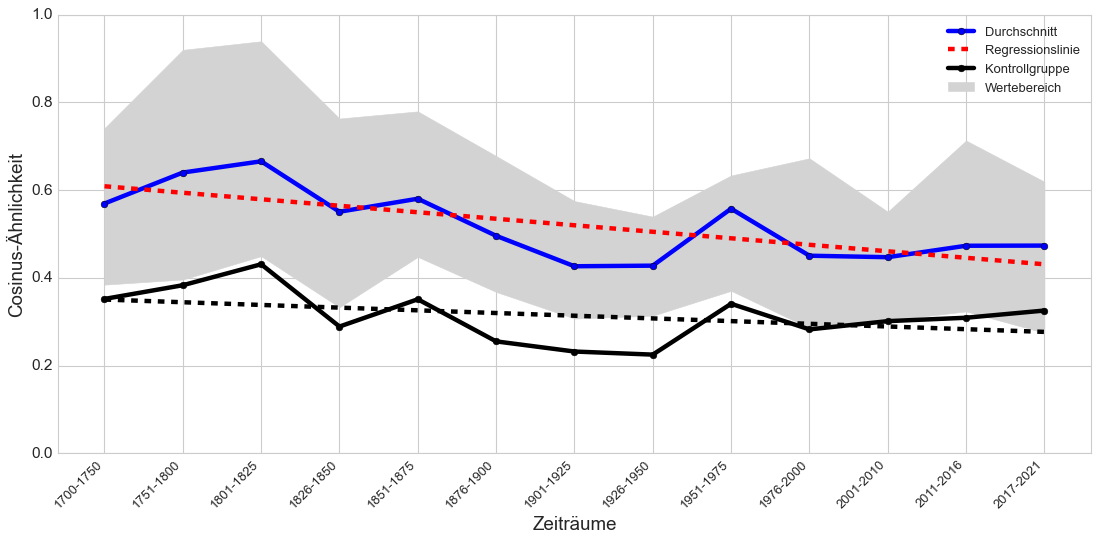

In [88]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(spaventosamente_mean)))
plt.xticks(ticks=x_indexes, labels=spaventosamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, spaventosamente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, spaventosamente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, spaventosamente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, spaventosamente_max_list, spaventosamente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(spaventosamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

#Kontrollgruppe
plt.plot(x_indexes, control_mean.values(), label='Kontrollgruppe', marker='o', color='black')
coef = np.polyfit(x_indexes, list(control_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), linestyle='--', color='black')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### terribilmente

In [69]:
compare_words(periods, models, 'terribilmente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1975,1976-2000,2001-2010,2011-2016,2017-2021
0,"(disbarcare, 0.8977779746055603)","(esarchi, 0.8938268423080444)","(impenetrabile, 0.9176108837127686)","(nerbo, 0.881392240524292)","(dolorosamente, 0.9015963673591614)","(impassibile, 0.7114067673683167)","(zuccone, 0.7219353914260864)","(incomposto, 0.6991757750511169)","(conscio, 0.81654953956604)","(tremendamente, 0.8744643330574036)","(tremendamente, 0.9022032022476196)","(tremendamente, 0.8893652558326721)","(tremendamente, 0.9034845232963562)"
1,"(ein, 0.8935316205024719)","(allontanollo, 0.8932322263717651)","(lagrimevole, 0.9048014879226685)","(percossa, 0.8805702328681946)","(turbato, 0.8780904412269592)","(stranamente, 0.7084872722625732)","(torturare, 0.7053368091583252)","(gelosia, 0.6674547791481018)","(patire, 0.7992600798606873)","(estremamente, 0.7193639874458313)","(mostruosamente, 0.724662184715271)","(spaventosamente, 0.7331547737121582)","(spaventosamente, 0.7923072576522827)"
2,"(granatello, 0.8912125825881958)","(pubblicate, 0.8901492953300476)","(molesto, 0.9030619263648987)","(urto, 0.868888258934021)","(rassegnato, 0.8677985072135925)","(straordinariamente, 0.698564350605011)","(atroce, 0.7027867436408997)","(affliggere, 0.6663634777069092)","(neppur, 0.7951866984367371)","(talmente, 0.6856866478919983)","(spaventosamente, 0.7013365030288696)","(mostruosamente, 0.7259922027587891)","(mostruosamente, 0.7809638381004333)"
3,"(crichi, 0.8902550339698792)","(fecesi, 0.8891274333000183)","(straordinarj, 0.9026148319244385)","(stocco, 0.8666873574256897)","(stravolgere, 0.8663475513458252)","(altero, 0.6933516263961792)","(sofferente, 0.678722620010376)","(laido, 0.6581294536590576)","(affabile, 0.7886436581611633)","(particolarmente, 0.6706925630569458)","(orribilmente, 0.6759095191955566)","(talmente, 0.7159863710403442)","(talmente, 0.7664461731910706)"
4,"(traversarono, 0.8899684548377991)","(sgombri, 0.8874125480651855)","(ricomporre, 0.9011849761009216)","(rattenere, 0.8648061752319336)","(delirante, 0.8650036454200745)","(ghigno, 0.6927006244659424)","(molestia, 0.6782823801040649)","(straziare, 0.646527111530304)","(maggiormente, 0.7858220338821411)","(altrettanto, 0.6546046137809753)","(profondamente, 0.6424903869628906)","(estremamente, 0.6926637291908264)","(incredibilmente, 0.7524759769439697)"
5,"(piccardia, 0.8898399472236633)","(ruffo, 0.8873014450073242)","(vibrazione, 0.8984853029251099)","(scaricare, 0.8642340302467346)","(abbattuto, 0.8643327951431274)","(disfatta, 0.6924512386322021)","(cagion, 0.6768091917037964)","(passacantando, 0.6448002457618713)","(diffidente, 0.7807345390319824)","(assai, 0.6472545266151428)","(estremamente, 0.6329141855239868)","(incredibilmente, 0.6732056736946106)","(assai, 0.7389584183692932)"
6,"(occhiobello, 0.8890273571014404)","(mostrer, 0.8867981433868408)","(acciaio, 0.8982017636299133)","(schiamazzo, 0.8637892007827759)","(languido, 0.8626545667648315)","(oppresso, 0.689448893070221)","(temuto, 0.6757038831710815)","(crudelmente, 0.644133985042572)","(vergognare, 0.777199923992157)","(spaventosamente, 0.6414105296134949)","(atrocemente, 0.6284782290458679)","(alquanto, 0.6684221029281616)","(affatto, 0.7386596202850342)"
7,"(garda, 0.8885378241539001)","(esservi, 0.8867313861846924)","(incantare, 0.8970763087272644)","(furibondo, 0.8635936379432678)","(pensoso, 0.8594728708267212)","(impenetrabile, 0.6879388689994812)","(provocazione, 0.674671471118927)","(immensamente, 0.637268602848053)","(frivolo, 0.7753559947013855)","(politicamente, 0.6383099555969238)","(particolarmente, 0.617077648639679)","(orribilmente, 0.6598615050315857)","(estremamente, 0.7331236004829407)"
8,"(combriel, 0.8854593634605408)","(dirassi, 0.885688304901123)","(torpore, 0.8969143629074097)","(esplosione, 0.8634558320045471)","(sfinire, 0.8594635128974915)","(rude, 0.687107264995575)","(inerme, 0.6745260953903198)","(canzonare, 0.6370831727981567)

In [70]:
compare_cos(periods, models, 'terribilmente', 'molto')

{'1700-1750': 0.3476589024066925,
 '1751-1800': 0.4646434485912323,
 '1801-1825': 0.5637304186820984,
 '1826-1850': 0.39233607053756714,
 '1851-1875': 0.5183914303779602,
 '1876-1900': 0.45371013879776,
 '1901-1925': 0.44383180141448975,
 '1926-1950': 0.40761077404022217,
 '1951-1975': 0.5437179803848267,
 '1976-2000': 0.555633544921875,
 '2001-2010': 0.47656625509262085,
 '2011-2016': 0.518480658531189,
 '2017-2021': 0.5764428973197937}

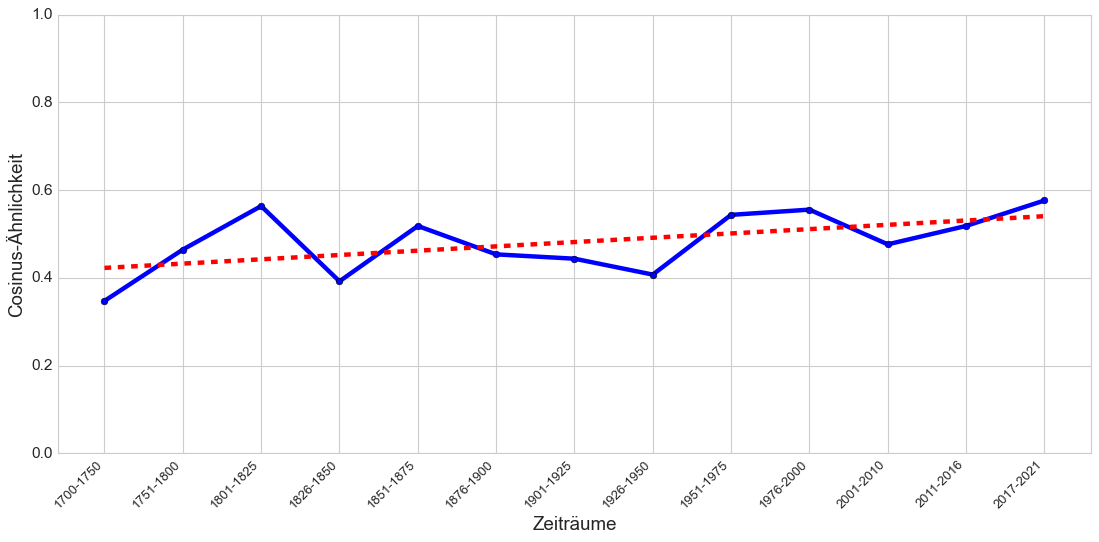

In [71]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'terribilmente', 'molto')
x_indexes = np.arange(len(data))
plt.ylim(0, 1)
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.plot(x_indexes, data.values(), label='terribilmente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

In [72]:
terribilmente1 = compare_cos(periods, models, 'terribilmente', 'angoscia')
terribilmente2 = compare_cos(periods, models, 'terribilmente', 'atterrire')
terribilmente3 = compare_cos(periods, models, 'terribilmente', 'panico')
terribilmente4 = compare_cos(periods, models, 'terribilmente', 'paura')
terribilmente5 = compare_cos(periods, models, 'terribilmente', 'raccapricciare')
terribilmente6 = compare_cos(periods, models, 'terribilmente', 'schifo')
terribilmente7 = compare_cos(periods, models, 'terribilmente', 'sgomentare')
terribilmente8 = compare_cos(periods, models, 'terribilmente', 'sgomento')
terribilmente9 = compare_cos(periods, models, 'terribilmente', 'spaventare')
terribilmente10 = compare_cos(periods, models, 'terribilmente', 'spavento')
terribilmente11 = compare_cos(periods, models, 'terribilmente', 'terrore')

In [73]:
terribilmente_df = pd.DataFrame([terribilmente1, terribilmente2, terribilmente3, terribilmente4, terribilmente5, terribilmente6, terribilmente7, terribilmente8, terribilmente9, terribilmente10, terribilmente11])

# Durchschnitt pro Zeitraum
terribilmente_mean = dict(terribilmente_df.mean())

# min pro Zeitraum
terribilmente_min = dict(terribilmente_df.min())
terribilmente_min_list = [float(x) for x in list(terribilmente_min.values())]

#max pro Zeitraum 
terribilmente_max = dict(terribilmente_df.max())
terribilmente_max_list = [float(x) for x in list(terribilmente_max.values())]

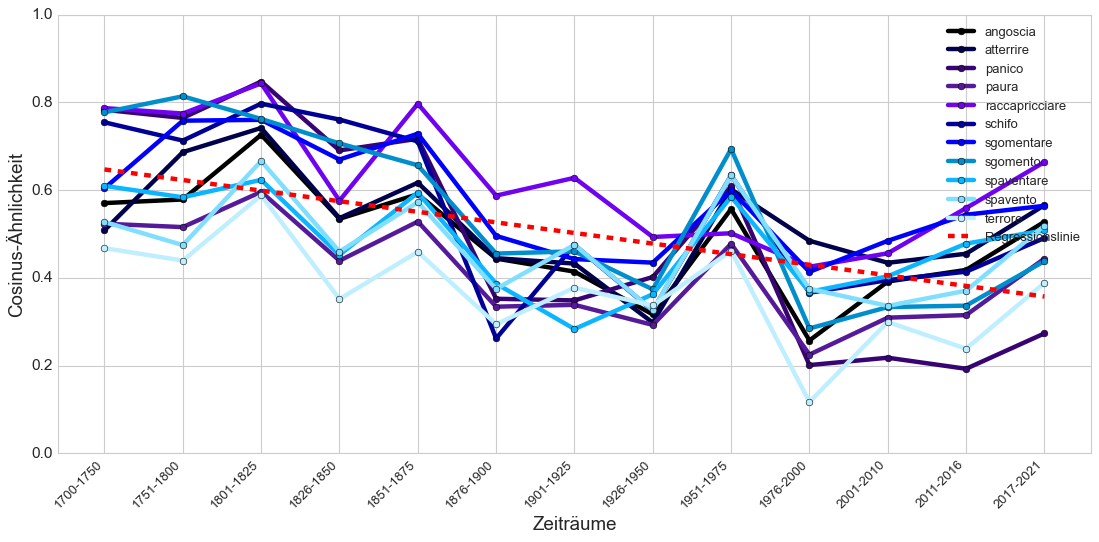

In [74]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(terribilmente_mean)))
plt.xticks(ticks=x_indexes, labels=terribilmente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, terribilmente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, terribilmente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, terribilmente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, terribilmente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, terribilmente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, terribilmente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, terribilmente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, terribilmente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, terribilmente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, terribilmente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, terribilmente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, terribilmente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(terribilmente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

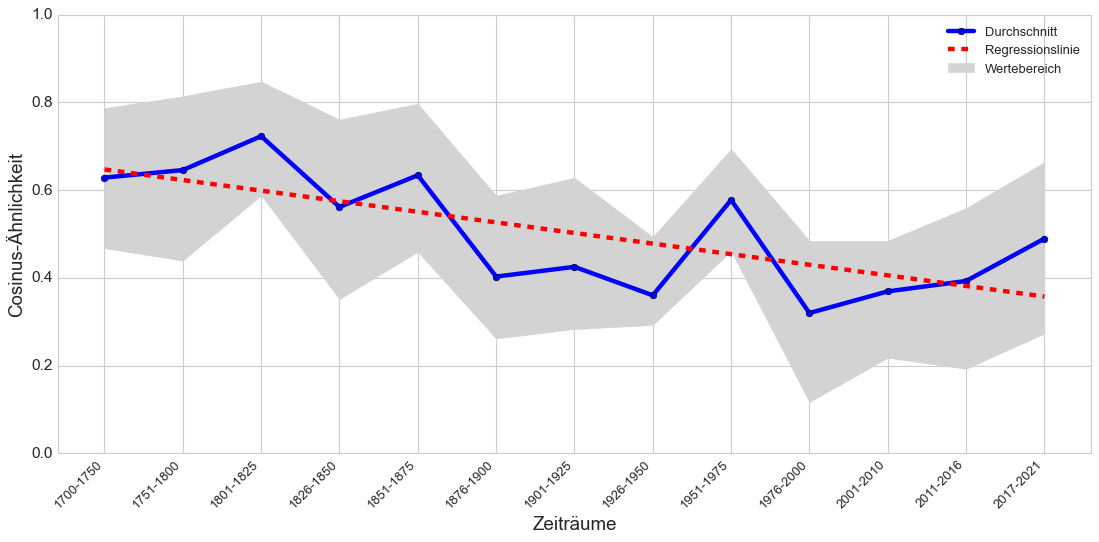

In [75]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(terribilmente_mean)))
plt.xticks(ticks=x_indexes, labels=terribilmente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, terribilmente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, terribilmente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, terribilmente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, terribilmente_max_list, terribilmente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(terribilmente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### tremendamente

In [76]:
compare_words(periods, models, 'tremendamente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1975,1976-2000,2001-2010,2011-2016,2017-2021
0,not in vocab,not in vocab,"(remeggio, 0.9784058928489685)","(plini, 0.9497191905975342)","(schianto, 0.9030153751373291)","(mitigare, 0.8642922043800354)","(gastigata, 0.8943625688552856)","(pietrificata, 0.8362985253334045)","(inefficace, 0.9097101092338562)","(terribilmente, 0.8744643926620483)","(terribilmente, 0.9022031426429749)","(terribilmente, 0.8893653154373169)","(terribilmente, 0.9034844636917114)"
1,not in vocab,not in vocab,"(nebulon, 0.9780855774879456)","(racchiusi, 0.9493405222892761)","(delirante, 0.9024021029472351)","(comprimere, 0.8600980639457703)","(pensata, 0.8852555751800537)","(inspiegabile, 0.8348222970962524)","(convenzionalità, 0.9091798067092896)","(estremamente, 0.7822626829147339)","(mostruosamente, 0.7972805500030518)","(mostruosamente, 0.7625049948692322)","(mostruosamente, 0.7979291081428528)"
2,not in vocab,not in vocab,"(giuocano, 0.977154016494751)","(battutisi, 0.9480352401733398)","(rantolo, 0.8964231014251709)","(straziare, 0.8574299812316895)","(disonesto, 0.8848713636398315)","(mutismo, 0.8316260576248169)","(statalistiche, 0.908128023147583)","(tecnicamente, 0.7664176821708679)","(spaventosamente, 0.7221668362617493)","(estremamente, 0.7342091202735901)","(talmente, 0.7902937531471252)"
3,not in vocab,not in vocab,"(nemeo, 0.9764874577522278)","(provai, 0.9470388293266296)","(dolorosamente, 0.8963989615440369)","(irritazione, 0.8570979833602905)","(sragionare, 0.8837571740150452)","(tedio, 0.8315614461898804)","(transazione, 0.9068500399589539)","(talmente, 0.7582510709762573)","(orribilmente, 0.7079430222511292)","(spaventosamente, 0.7159939408302307)","(spaventosamente, 0.7768694758415222)"
4,not in vocab,not in vocab,"(predargli, 0.9764405488967896)","(abbracciaronsi, 0.9462189674377441)","(sanguinare, 0.8953270316123962)","(disdegno, 0.8544096350669861)","(libertino, 0.8836286664009094)","(inquietitudine, 0.830808699131012)","(mélange, 0.9056967496871948)","(spaventosamente, 0.7502779364585876)","(estremamente, 0.7008177042007446)","(incredibilmente, 0.6956676244735718)","(estremamente, 0.7673419713973999)"
5,not in vocab,not in vocab,"(clangore, 0.9756827354431152)","(delluom, 0.9460068345069885)","(singulto, 0.8942956924438477)","(lenire, 0.8506452441215515)","(mentiva, 0.8804786205291748)","(impreparato, 0.8290141820907593)","(oltranzista, 0.9027655124664307)","(altrettanto, 0.7458910942077637)","(profondamente, 0.6976951360702515)","(talmente, 0.6885455846786499)","(incredibilmente, 0.7575475573539734)"
6,not in vocab,not in vocab,"(imprigionato, 0.9756656289100647)","(serrette, 0.9452027082443237)","(stravolgere, 0.8941842913627625)","(impressionabile, 0.8497878909111023)","(disprezzarlo, 0.8798149228096008)","(ossa, 0.8277760148048401)","(divulgare, 0.9015421271324158)","(politicamente, 0.741051971912384)","(alquanto, 0.6773436069488525)","(abbastanza, 0.686333954334259)","(assai, 0.7487443685531616)"
7,not in vocab,not in vocab,"(serano, 0.9754499197006226)","(nocciolo, 0.944558322429657)","(fatidico, 0.8910612463951111)","(scoramento, 0.8451219201087952)","(sciocca, 0.878631055355072)","(piena, 0.8275092840194702)","(cosiffatte, 0.9006814956665039)","(mostruosamente, 0.7397774457931519)","(talmente, 0.6748960018157959)","(alquanto, 0.6830447316169739)","(abbastanza, 0.7322685122489929)"
8,not in vocab,not in vocab,"(fervid, 0.9751879572868347)","(giugneano, 0.9439314603805542)","(balsamo, 0.8904639482498169)","(commoveva, 0.8443748950958252)","(serbarsi, 0.8763471245765686)","(esecrabile, 0.8257995247840881)","(attendistici, 0.9005420207977295)","(particolarmente, 0.732204258441925)","(veramente, 0.6739646196365356)","(particolarmente, 0.6713566780090332)","(decisamente, 0.7253945469856262)"
9,not in vocab,not in vocab,"(condutto, 0.9751325249671936)","(vituperato, 0.9435344338417053)","(sarcasmo, 0.8873022198677063)","(invocazione, 0.8437716

In [77]:
compare_cos(periods, models, 'tremendamente', 'molto')

{'1801-1825': 0.4226156175136566,
 '1826-1850': 0.48595327138900757,
 '1851-1875': 0.4711177349090576,
 '1876-1900': 0.48693105578422546,
 '1901-1925': 0.49484118819236755,
 '1926-1950': 0.4055306911468506,
 '1951-1975': 0.5016288757324219,
 '1976-2000': 0.6454623937606812,
 '2001-2010': 0.5362990498542786,
 '2011-2016': 0.5777130722999573,
 '2017-2021': 0.5822657346725464}

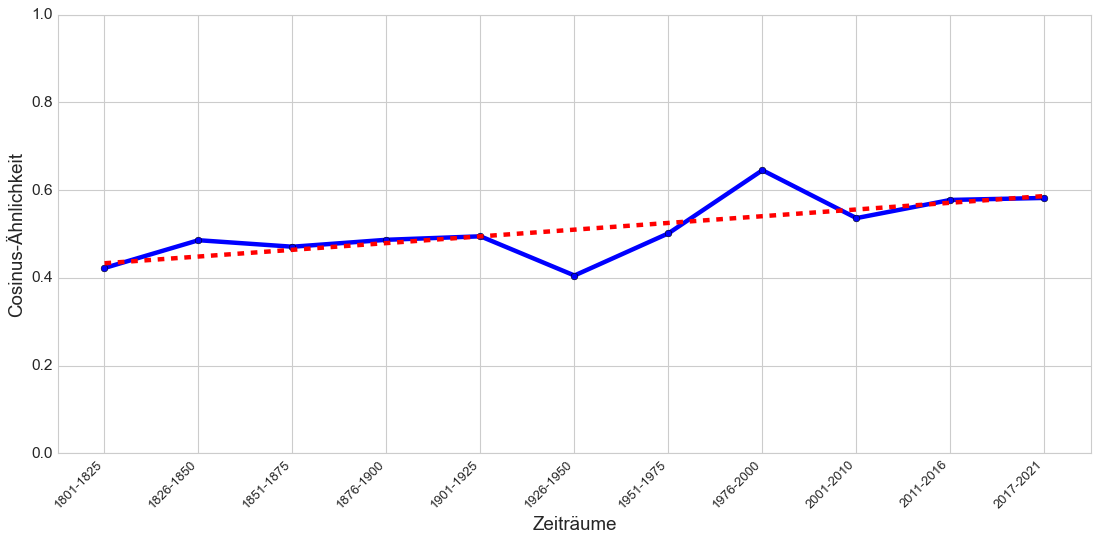

In [78]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'tremendamente', 'molto')
x_indexes = np.arange(len(data))
plt.ylim(0, 1)
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.plot(x_indexes, data.values(), label='tremendamente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

In [79]:
tremendamente1 = compare_cos(periods, models, 'tremendamente', 'angoscia')
tremendamente2 = compare_cos(periods, models, 'tremendamente', 'atterrire')
tremendamente3 = compare_cos(periods, models, 'tremendamente', 'panico')
tremendamente4 = compare_cos(periods, models, 'tremendamente', 'paura')
tremendamente5 = compare_cos(periods, models, 'tremendamente', 'raccapricciare')
tremendamente6 = compare_cos(periods, models, 'tremendamente', 'schifo')
tremendamente7 = compare_cos(periods, models, 'tremendamente', 'sgomentare')
tremendamente8 = compare_cos(periods, models, 'tremendamente', 'sgomento')
tremendamente9 = compare_cos(periods, models, 'tremendamente', 'spaventare')
tremendamente10 = compare_cos(periods, models, 'tremendamente', 'spavento')
tremendamente11 = compare_cos(periods, models, 'tremendamente', 'terrore')

In [80]:
tremendamente_df = pd.DataFrame([tremendamente1, tremendamente2, tremendamente3, tremendamente4, tremendamente5, tremendamente6, tremendamente7, tremendamente8, tremendamente9, tremendamente10, tremendamente11])

# Durchschnitt pro Zeitraum
tremendamente_mean = dict(tremendamente_df.mean())

# min pro Zeitraum
tremendamente_min = dict(tremendamente_df.min())
tremendamente_min_list = [float(x) for x in list(tremendamente_min.values())]

#max pro Zeitraum 
tremendamente_max = dict(tremendamente_df.max())
tremendamente_max_list = [float(x) for x in list(tremendamente_max.values())]

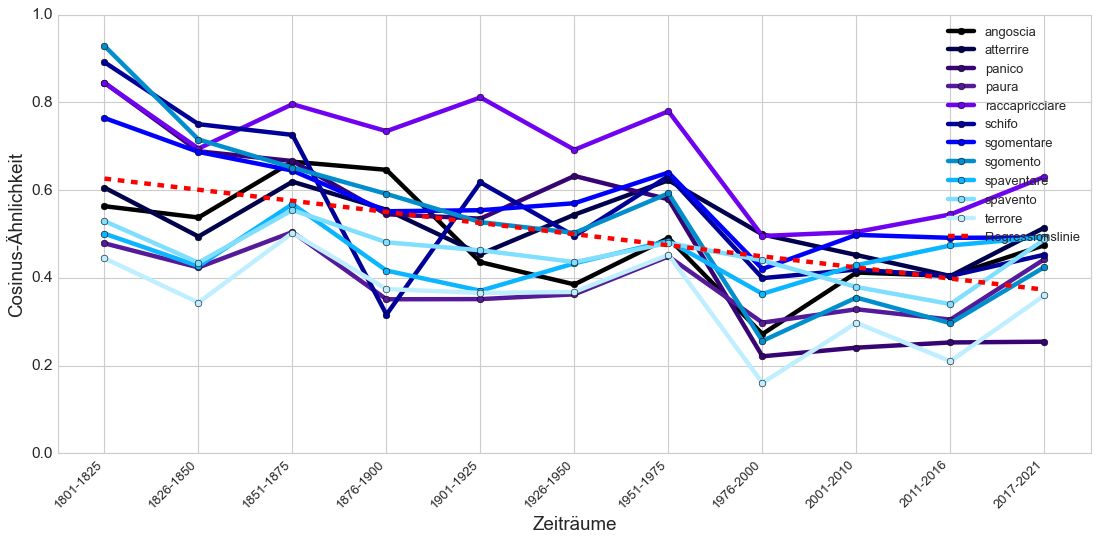

In [81]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(tremendamente_mean)))
plt.xticks(ticks=x_indexes, labels=tremendamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, tremendamente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, tremendamente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, tremendamente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, tremendamente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, tremendamente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, tremendamente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, tremendamente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, tremendamente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, tremendamente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, tremendamente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, tremendamente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, tremendamente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(tremendamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

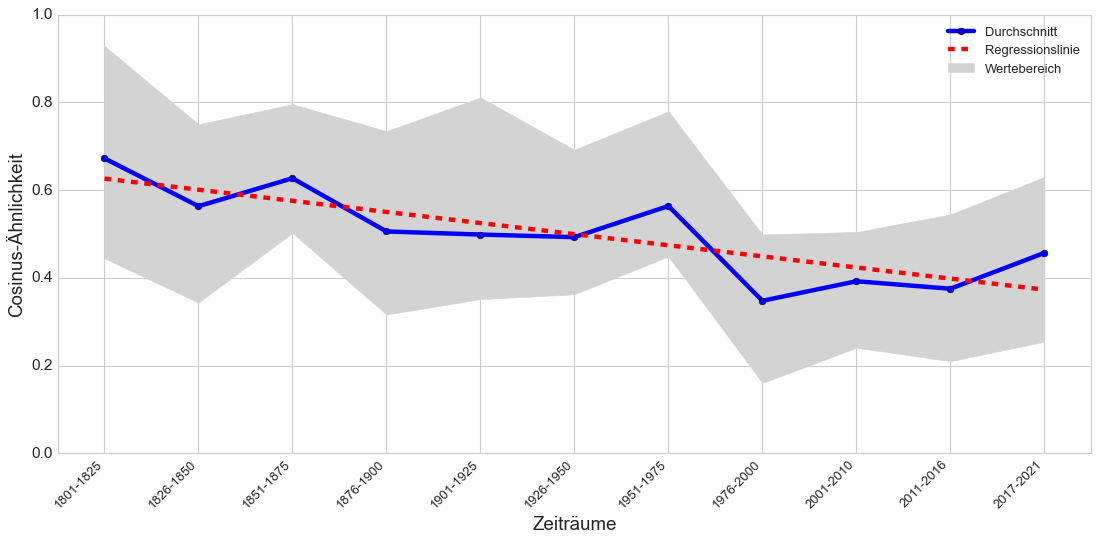

In [82]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(tremendamente_mean)))
plt.xticks(ticks=x_indexes, labels=tremendamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, tremendamente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, tremendamente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, tremendamente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, tremendamente_max_list, tremendamente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(tremendamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()